# Data Analysis

In [1]:
%pip install statsmodels
%pip install seaborn
%pip install scipy
%pip install matplotlib
%pip install pandas
%pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, gumbel_r, t
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[noti

In [ ]:
tokyo_data = pd.read_csv('../data/TOKYO_DAILY_CLIMATE_BEST_Jan14May24.csv')

tokyo_data['Date'] = pd.to_datetime(tokyo_data['DATE'], format='%Y-%m-%d')
tokyo_data = tokyo_data.set_index('Date')

tokyo_data.head()


WMO  WBAN  ICAO     SRC_ID   CITY     LAT     LONG   ALT  \
Date                                                                       
2014-01-01  47662.0   NaN  RJTD  JPN_47662  TOKYO  35.692  139.751  36.0   
2014-01-02      NaN   NaN   NaN  JPN_47662    NaN     NaN      NaN   NaN   
2014-01-03      NaN   NaN   NaN  JPN_47662    NaN     NaN      NaN   NaN   
2014-01-04      NaN   NaN   NaN  JPN_47662    NaN     NaN      NaN   NaN   
2014-01-05      NaN   NaN   NaN  JPN_47662    NaN     NaN      NaN   NaN   

                  DATE  TAVG24_DATATYPE  TAVG24  
Date                                             
2014-01-01  2014-01-01               15     9.6  
2014-01-02  2014-01-02               15     7.3  
2014-01-03  2014-01-03               15     5.9  
2014-01-04  2014-01-04               15     6.5  
2014-01-05  2014-01-05               15     5.4

In [ ]:
tokyo_data.tail()

WMO  WBAN ICAO     SRC_ID CITY  LAT  LONG  ALT        DATE  \
Date                                                                     
2024-05-27  NaN   NaN  NaN  JPN_47662  NaN  NaN   NaN  NaN  2024-05-27   
2024-05-28  NaN   NaN  NaN  JPN_47662  NaN  NaN   NaN  NaN  2024-05-28   
2024-05-29  NaN   NaN  NaN  JPN_47662  NaN  NaN   NaN  NaN  2024-05-29   
2024-05-30  NaN   NaN  NaN  JPN_47662  NaN  NaN   NaN  NaN  2024-05-30   
2024-05-31  NaN   NaN  NaN  JPN_47662  NaN  NaN   NaN  NaN  2024-05-31   

            TAVG24_DATATYPE  TAVG24  
Date                                 
2024-05-27               15    22.3  
2024-05-28               15    24.0  
2024-05-29               15    22.0  
2024-05-30               15    22.5  
2024-05-31               15    19.0

In [ ]:
tokyo_data.describe()

WMO  WBAN     LAT     LONG   ALT  TAVG24_DATATYPE       TAVG24
count      1.0   0.0   1.000    1.000   1.0           3804.0  3804.000000
mean   47662.0   NaN  35.692  139.751  36.0             15.0    16.444269
std        NaN   NaN     NaN      NaN   NaN              0.0     7.873254
min    47662.0   NaN  35.692  139.751  36.0             15.0    -0.300000
25%    47662.0   NaN  35.692  139.751  36.0             15.0     9.200000
50%    47662.0   NaN  35.692  139.751  36.0             15.0    16.700000
75%    47662.0   NaN  35.692  139.751  36.0             15.0    22.800000
max    47662.0   NaN  35.692  139.751  36.0             15.0    32.200000

In [5]:
tokyo_data = tokyo_data.drop(columns = ['WMO', 'WBAN', 'SRC_ID', 'ALT', 'LAT', 'LONG', 'TAVG24_DATATYPE', 'DATE'])

Text(0.5, 1.0, 'Daily Average Temperature in Tokyo')

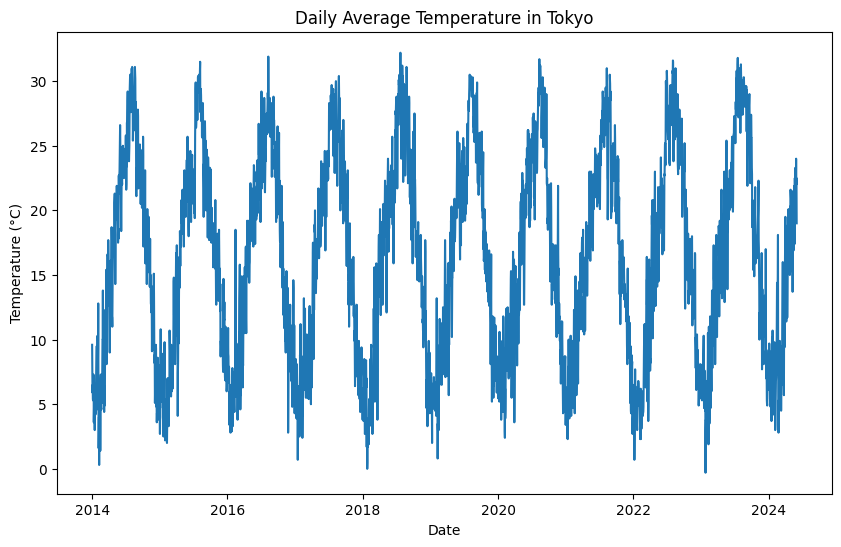

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(tokyo_data.index, tokyo_data['TAVG24'], label='TAVG24 over time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature in Tokyo')


In [7]:
# import os
# import glob

# folder_path = '../data/'

# files = glob.glob(os.path.join(folder_path, '*'))

# for file in files:
#     print(f'{file}')

In [8]:
cities = {
    'Amsterdam': '../data/AMSTERDAM SCHIPHOL_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Atlanta': '../data/Atlanta-Hartsfield International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Boston': '../data/Boston-Logan International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Burbank': '../data/Burbank-Glendale-Pasadena Airport _DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Chicago': '../data/Chicago OHare International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Cincinnati': '../data/Cincinnati-Northern Kentucky International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Dallas': '../data/Dallas-Fort Worth International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Essen': '../data/ESSEN_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Houston': '../data/Houston-George Bush Intercontinental Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Las Vegas': '../data/Las Vegas Mccarran Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'London': '../data/LONDON HEATHROW_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Minneapolis': '../data/Minneapolis-Saint Paul International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'New York': '../data/New York LaGuardia Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Paris': '../data/PARIS ORLY_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Philadelphia': '../data/Philadelphia International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Portland': '../data/Portland International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Sacramento': '../data/Sacramento Executive Airport_DAILY_CLIMATE_BEST_Jan14May24.csv'
}

t_max = pd.DataFrame()
t_min = pd.DataFrame()
t_avg = pd.DataFrame()

for city, file in cities.items():
    data = pd.read_csv(file)
    data['Date'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
    data = data.set_index('Date')
    
    # Convert Fahrenheit to Celsius
    if city in ['Atlanta', 'Boston', 'Chicago', 'Cincinnati', 'Dallas', 'Houston', 'Las Vegas', 'Minneapolis', 'New York', 'Philadelphia', 'Portland', 'Sacramento']:
        t_max[city] = ((data[['DAILY_MAX_TEMP']] - 32)*5.0)/9.0
        t_min[city] = ((data[['DAILY_MIN_TEMP']] - 32)*5.0)/9.0
    else:
        t_max[city] = data[['DAILY_MAX_TEMP']]
        t_min[city] = data[['DAILY_MIN_TEMP']]
    t_avg[city] = (t_max[city] + t_min[city])/2
    

t_avg['Tokyo'] = tokyo_data[['TAVG24']]
t_avg.head()

Amsterdam   Atlanta     Boston  Burbank    Chicago  Cincinnati  \
Date                                                                         
2014-01-01       6.55  5.000000  -4.444444     60.5  -8.888889    1.666667   
2014-01-02       7.75  3.888889 -10.000000     67.0 -12.222222   -3.888889   
2014-01-03       8.50 -1.944444 -13.333333     62.5 -15.555556  -11.944444   
2014-01-04       7.45 -1.111111  -9.722222     60.0  -3.888889   -3.888889   
2014-01-05       5.15  6.111111  -0.555556     62.0 -10.555556    2.222222   

               Dallas  Essen    Houston  Las Vegas  London  Minneapolis  \
Date                                                                      
2014-01-01  10.000000   6.45  13.055556  11.666667     8.5   -19.722222   
2014-01-02   1.111111   7.85   8.888889  11.666667     8.6   -19.444444   
2014-01-03   3.611111   8.60   5.833333  10.555556     8.6   -12.500000   
2014-01-04  13.055556   8.00  10.277778  10.833333     7.4    -8.611111   
2014-01-05   1.944444   6.40  10.000000   7.777778     6.6   -23.888889   

            New York  Paris  Philadelphia  Portland  Sacramento  Tokyo  
Date                                                                    
2014-01-01 -1.666667   8.45      0.000000  3.888889    8.055556    9.6  
2014-01-02 -3.888889   9.75     -1.944444  4.722222   10.277778    7.3  
2014-01-03 -9.722222  11.10     -8.611111  3.888889   10.000000    5.9  
2014-01-04 -7.500000   9.95     -7.500000  1.111111   10.555556    6.5  
2014-01-05  3.055556   7.50      1.944444  2.777778    9.166667    5.4

Text(0, 0.5, 'Temperature (°C)')

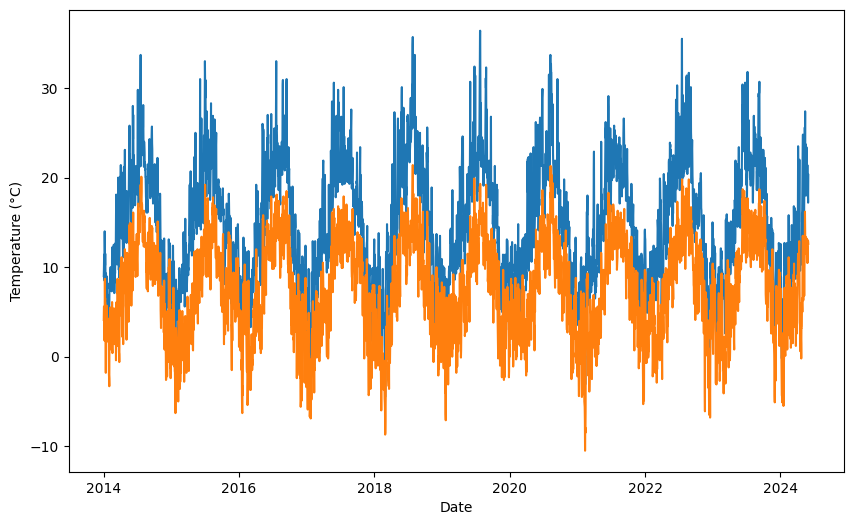

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Amsterdam'], label='Amsterdam')
plt.plot(t_min.index, t_min['Amsterdam'], label='Amsterdam')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

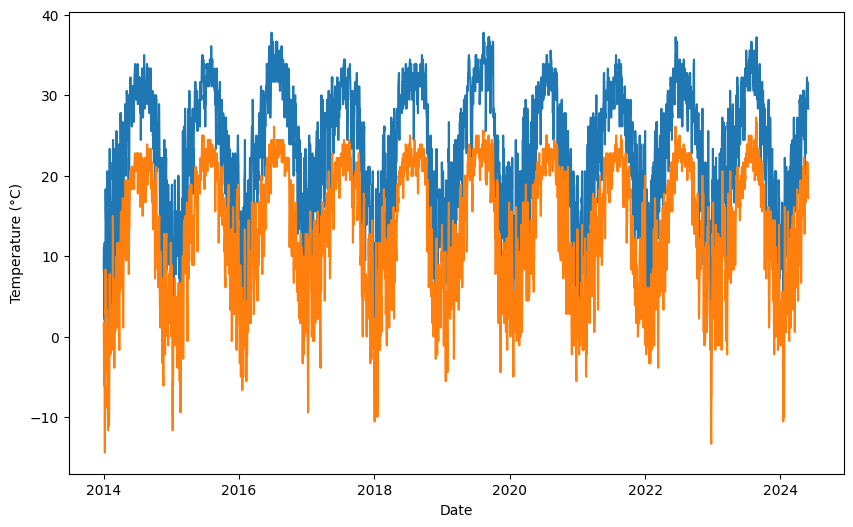

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Atlanta'], label='Atlanta')
plt.plot(t_min.index, t_min['Atlanta'], label='Atlanta')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

In [ ]:
correlation = t_avg.corr()
correlation

Amsterdam   Atlanta    Boston   Burbank   Chicago  Cincinnati  \
Amsterdam      1.000000  0.744674  0.789553  0.664613  0.778784    0.754198   
Atlanta        0.744674  1.000000  0.862837  0.604199  0.878280    0.933894   
Boston         0.789553  0.862837  1.000000  0.677924  0.870341    0.878949   
Burbank        0.664613  0.604199  0.677924  1.000000  0.646286    0.611308   
Chicago        0.778784  0.878280  0.870341  0.646286  1.000000    0.950497   
Cincinnati     0.754198  0.933894  0.878949  0.611308  0.950497    1.000000   
Dallas         0.752024  0.858713  0.815862  0.646922  0.902561    0.893944   
Essen          0.973108  0.739625  0.772147  0.647441  0.767766    0.746229   
Houston        0.722036  0.893912  0.806387  0.593785  0.870268    0.892466   
Las Vegas      0.793299  0.777908  0.809896  0.843624  0.812051    0.781912   
London         0.941890  0.754837  0.796760  0.676287  0.783357    0.763178   
Minneapolis    0.783552  0.837025  0.838464  0.675937  0.953103    0.894225   
New York       0.794950  0.893848  0.979350  0.679862  0.897503    0.911513   
Paris          0.938696  0.752719  0.785786  0.669607  0.781581    0.758898   
Philadelphia   0.791008  0.911518  0.962412  0.674431  0.894876    0.922311   
Portland       0.774556  0.749937  0.794454  0.794184  0.792848    0.762471   
Sacramento     0.772974  0.745874  0.781060  0.864757  0.773862    0.747410   
Tokyo          0.812110  0.815253  0.851493  0.735854  0.847449    0.822832   

                Dallas     Essen   Houston  Las Vegas    London  Minneapolis  \
Amsterdam     0.752024  0.973108  0.722036   0.793299  0.941890     0.783552   
Atlanta       0.858713  0.739625  0.893912   0.777908  0.754837     0.837025   
Boston        0.815862  0.772147  0.806387   0.809896  0.796760     0.838464   
Burbank       0.646922  0.647441  0.593785   0.843624  0.676287     0.675937   
Chicago       0.902561  0.767766  0.870268   0.812051  0.783357     0.953103   
Cincinnati    0.893944  0.746229  0.892466   0.781912  0.763178     0.894225   
Dallas        1.000000  0.743550  0.942468   0.821201  0.764085     0.887076   
Essen         0.743550  1.000000  0.717281   0.783077  0.930999     0.772781   
Houston       0.942468  0.717281  1.000000   0.777992  0.736173     0.836057   
Las Vegas     0.821201  0.783077  0.777992   1.000000  0.802774     0.844228   
London        0.764085  0.930999  0.736173   0.802774  1.000000     0.787921   
Minneapolis   0.887076  0.772781  0.836057   0.844228  0.787921     1.000000   
New York      0.837343  0.777759  0.831385   0.815984  0.801396     0.861458   
Paris         0.764477  0.950863  0.740945   0.805554  0.941358     0.787666   
Philadelphia  0.838398  0.775583  0.836127   0.817614  0.798282     0.857629   
Portland      0.779693  0.765573  0.737263   0.878821  0.779385     0.819792   
Sacramento    0.768840  0.760923  0.735116   0.923826  0.777094     0.800448   
Tokyo         0.826958  0.798063  0.799448   0.861592  0.818675     0.855358   

              New York     Paris  Philadelphia  Portland  Sacramento     Tokyo  
Amsterdam     0.794950  0.938696      0.791008  0.774556    0.772974  0.812110  
Atlanta       0.893848  0.752719      0.911518  0.749937    0.745874  0.815253  
Boston        0.979350  0.785786      0.962412  0.794454    0.781060  0.851493  
Burbank       0.679862  0.669607      0.674431  0.794184    0.864757  0.735854  
Chicago       0.897503  0.781581      0.894876  0.792848    0.773862  0.847449  
Cincinnati    0.911513  0.758898      0.922311  0.762471    0.747410  0.822832  
Dallas        0.837343  0.764477      0.838398  0.779693    0.768840  0.826958  
Essen         0.777759  0.950863      0.775583  0.765573    0.760923  0.798063  
Houston       0.831385  0.740945      0.836127  0.737263    0.735116  0.799448  
Las Vegas     0.815984  0.805554      0.817614  0.878821    0.923826  0.861592  
London        0.801396  0.941358      0.798282  0.779385    0.777094  0.818675  
Minneapolis   0.861

## Test Normality of difference of Temperature
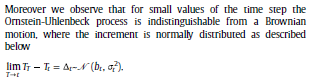



In [12]:
t_change = t_avg.diff().round(2)
t_change.dropna(inplace=True)
t_change.head()

Amsterdam  Atlanta  Boston  Burbank  Chicago  Cincinnati  Dallas  \
Date                                                                           
2014-01-02       1.20    -1.11   -5.56      6.5    -3.33       -5.56   -8.89   
2014-01-03       0.75    -5.83   -3.33     -4.5    -3.33       -8.06    2.50   
2014-01-04      -1.05     0.83    3.61     -2.5    11.67        8.06    9.44   
2014-01-05      -2.30     7.22    9.17      2.0    -6.67        6.11  -11.11   
2014-01-06       5.10    -5.83    6.39      0.5   -12.22      -15.28   -6.39   

            Essen  Houston  Las Vegas  London  Minneapolis  New York  Paris  \
Date                                                                          
2014-01-02   1.40    -4.17       0.00    0.10         0.28     -2.22   1.30   
2014-01-03   0.75    -3.06      -1.11    0.00         6.94     -5.83   1.35   
2014-01-04  -0.60     4.44       0.28   -1.20         3.89      2.22  -1.15   
2014-01-05  -1.60    -0.28      -3.06   -0.80       -15.28     10.56  -2.45   
2014-01-06   2.00   -10.28       0.00    1.05        -3.61     -0.56   3.05   

            Philadelphia  Portland  Sacramento  Tokyo  
Date                                                   
2014-01-02         -1.94      0.83        2.22   -2.3  
2014-01-03         -6.67     -0.83       -0.28   -1.4  
2014-01-04          1.11     -2.78        0.56    0.6  
2014-01-05          9.44      1.67       -1.39   -1.1  
2014-01-06          0.56      0.00       -0.56   -0.1

In [13]:
t_change.describe()

Amsterdam      Atlanta       Boston      Burbank      Chicago  \
count  3803.000000  3803.000000  3803.000000  3803.000000  3803.000000   
mean      0.002603     0.004715     0.005993     0.001315     0.007097   
std       2.077268     2.729010     3.580863     3.349334     3.622468   
min      -8.500000   -11.670000   -13.060000   -17.000000   -14.720000   
25%      -1.250000    -1.110000    -2.220000    -2.000000    -1.940000   
50%      -0.050000     0.280000     0.000000     0.000000     0.280000   
75%       1.275000     1.670000     2.220000     2.000000     2.220000   
max       8.550000    10.830000    16.940000    15.500000    12.500000   

        Cincinnati       Dallas        Essen      Houston    Las Vegas  \
count  3803.000000  3803.000000  3803.000000  3803.000000  3803.000000   
mean      0.004365     0.003710     0.002169     0.002842     0.005717   
std       3.573483     3.303398     2.254903     2.980979     2.117375   
min     -15.280000   -14.720000   -10.100000   -14.440000   -10.830000   
25%      -1.940000    -1.390000    -1.350000    -1.110000    -1.110000   
50%       0.280000     0.280000     0.000000     0.280000     0.280000   
75%       1.940000     1.940000     1.450000     1.390000     1.390000   
max      13.330000    13.060000    10.050000    13.610000     6.670000   

            London  Minneapolis     New York        Paris  Philadelphia  \
count  3803.000000  3803.000000  3803.000000  3803.000000   3803.000000   
mean      0.001288     0.009863     0.005788     0.001591      0.004933   
std       1.991935     3.584668     3.271279     2.207829      3.296098   
min     -10.200000   -15.280000   -13.610000   -10.200000    -15.560000   
25%      -1.250000    -1.940000    -1.940000    -1.400000     -1.940000   
50%       0.150000     0.280000     0.280000     0.000000      0.280000   
75%       1.350000     2.220000     2.220000     1.450000      1.940000   
max       6.200000    13.890000    11.940000     9.100000     11.940000   

          Portland   Sacramento        Tokyo  
count  3803.000000  3803.000000  3803.000000  
mean      0.003723     0.004391     0.002472  
std       2.142617     1.905066     2.121911  
min      -9.720000    -8.610000   -11.900000  
25%      -1.390000    -1.110000    -1.200000  
50%       0.000000     0.000000     0.200000  
75%       1.390000     1.110000     1.400000  
max       8.330000     6.390000     8.000000

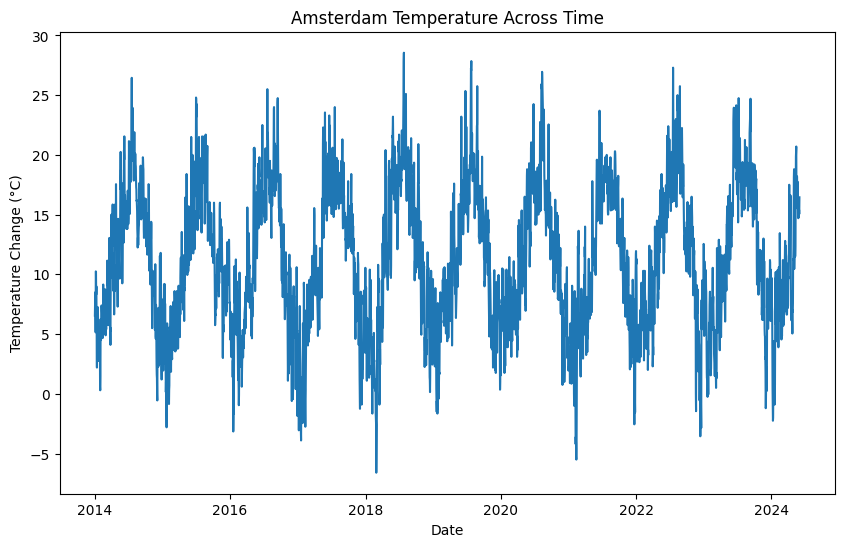

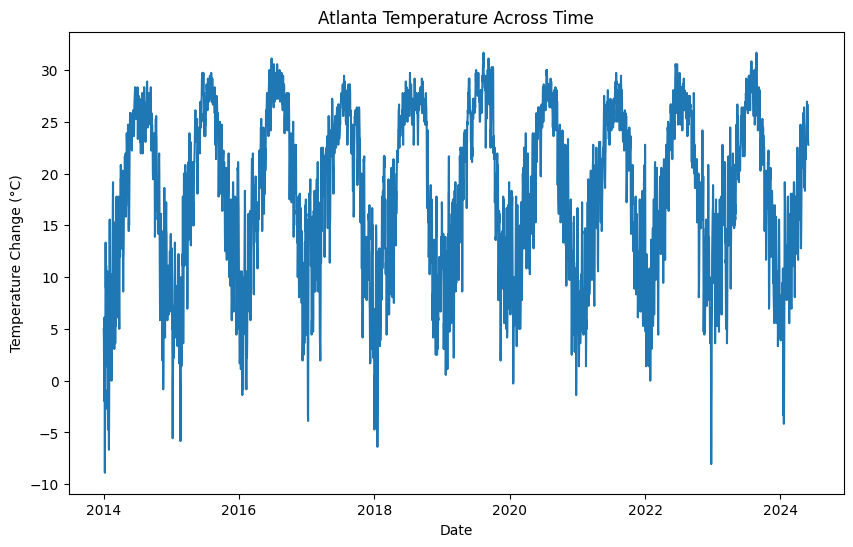

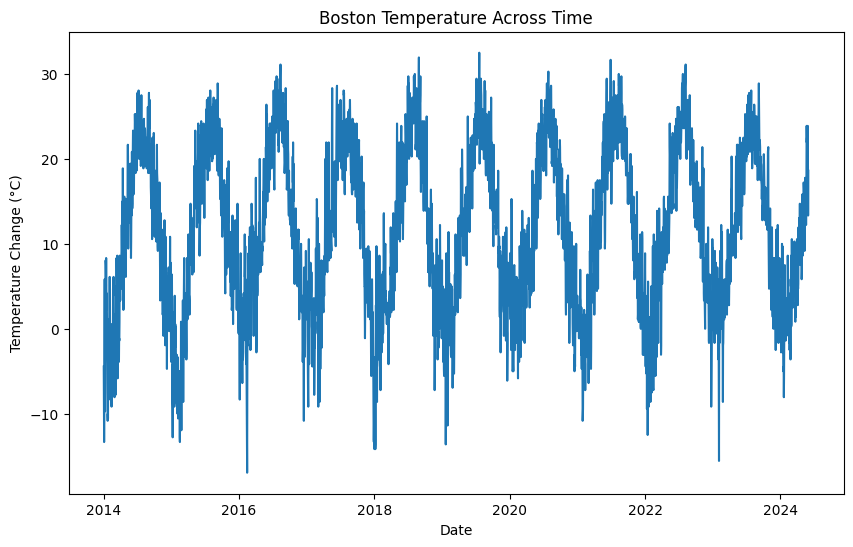

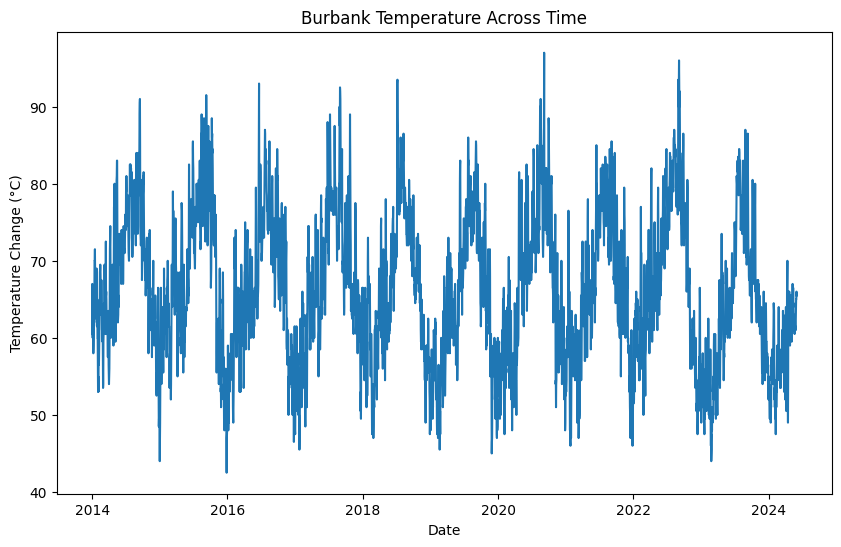

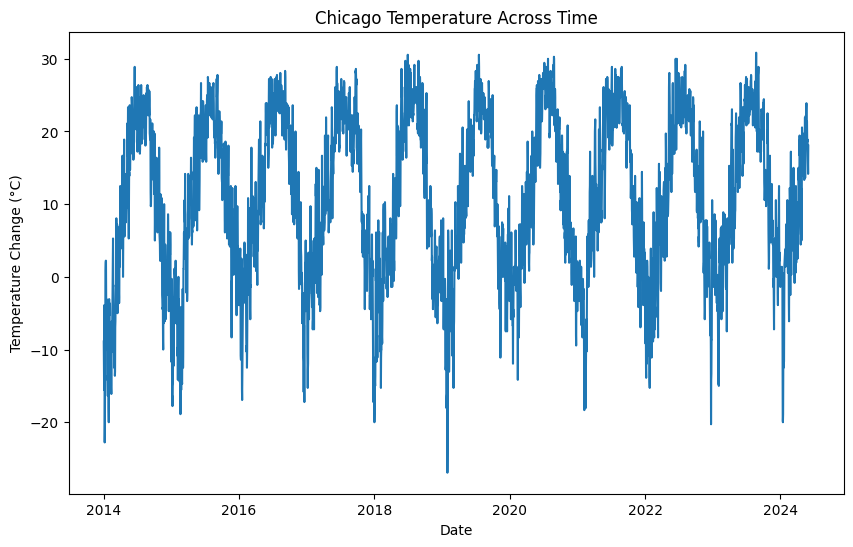

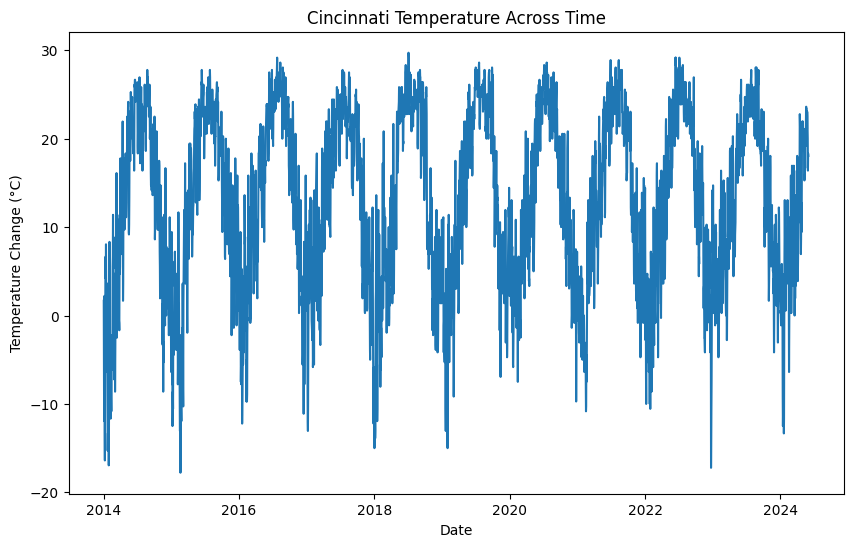

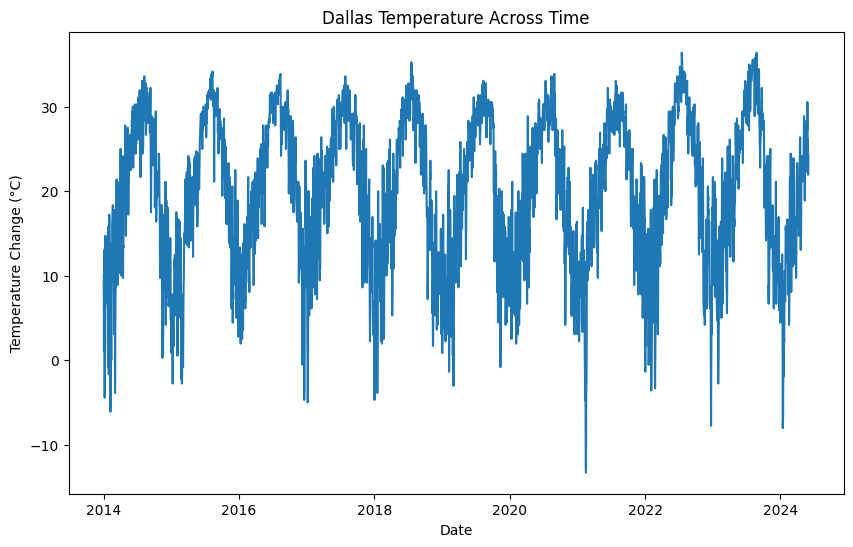

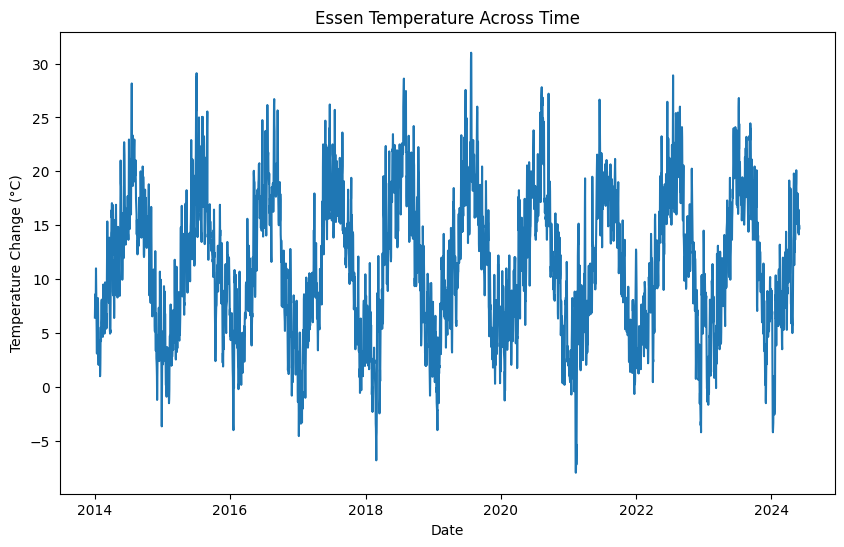

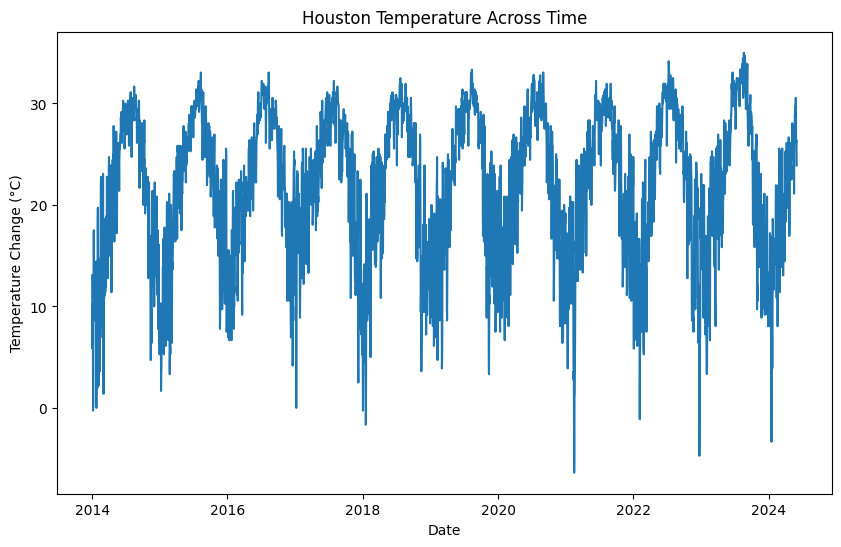

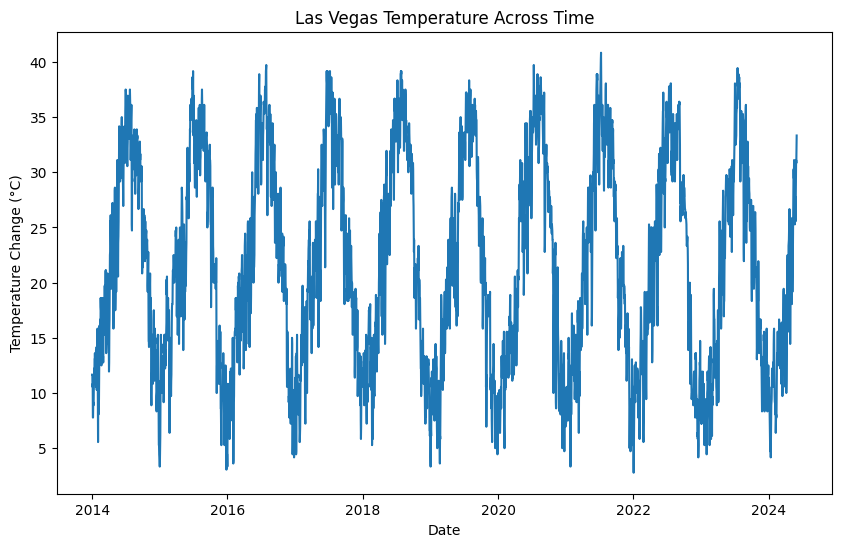

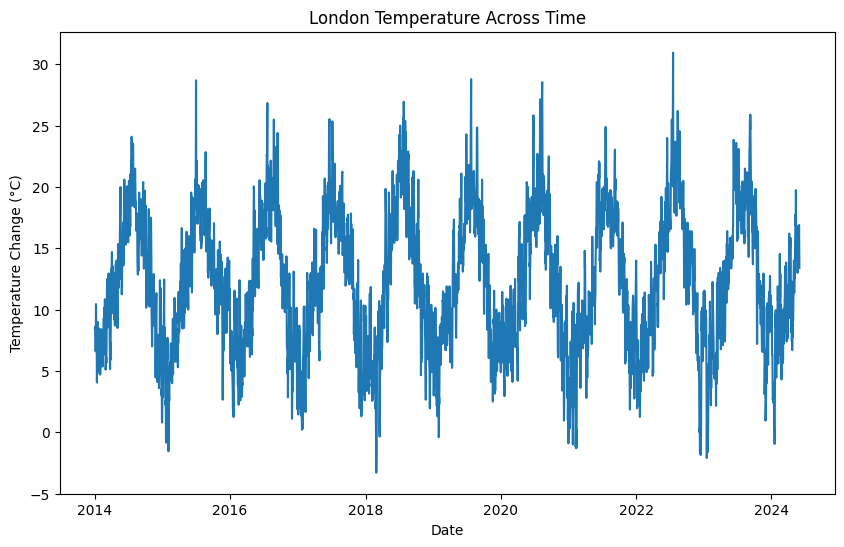

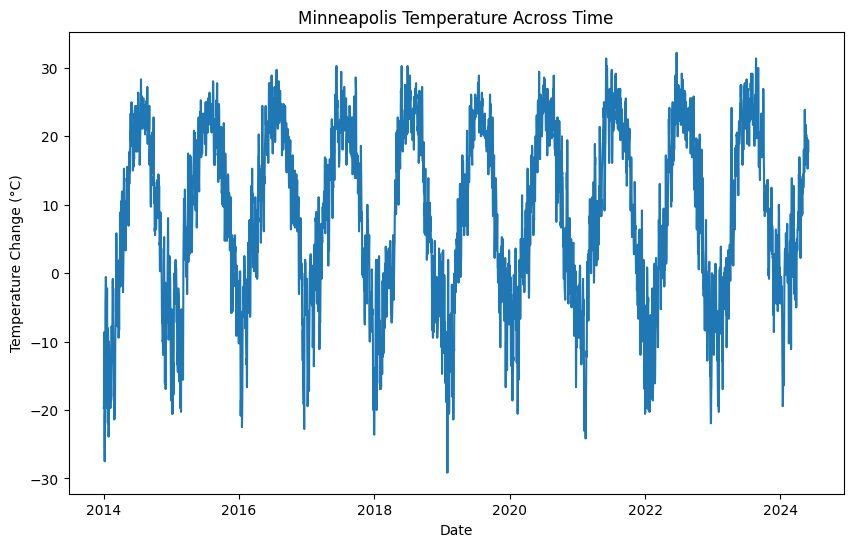

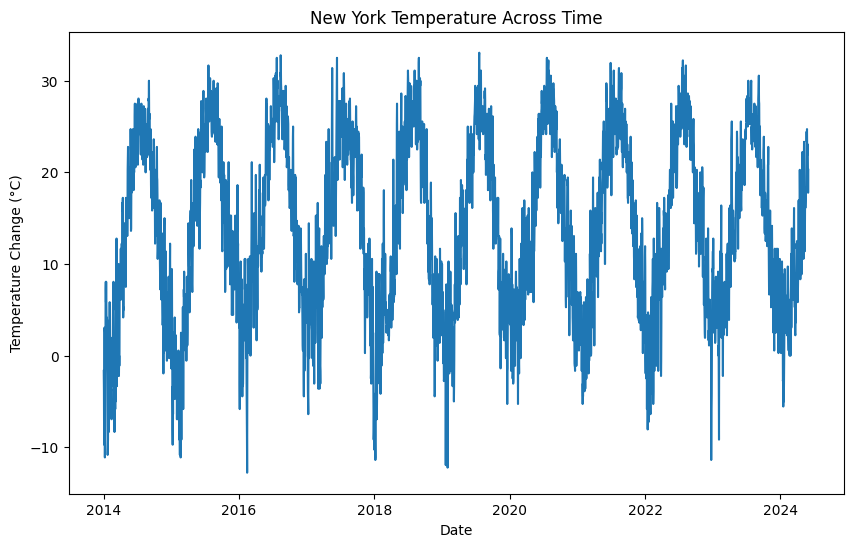

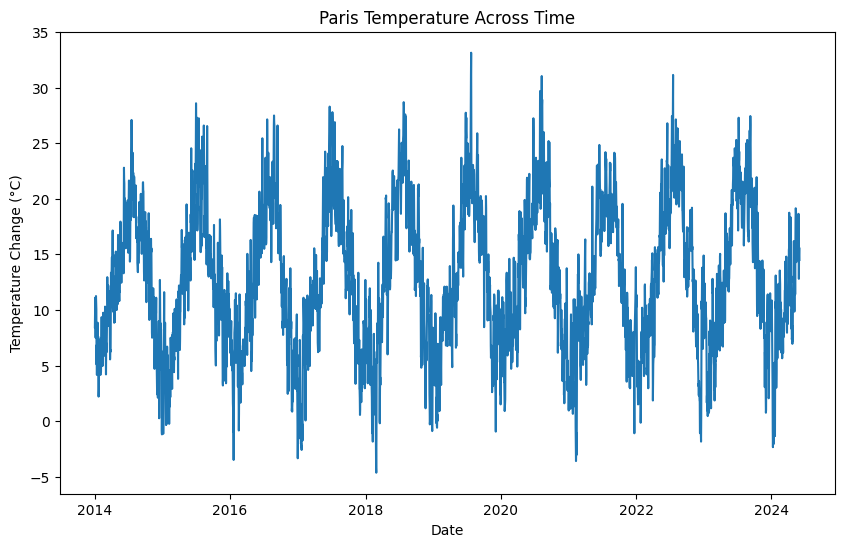

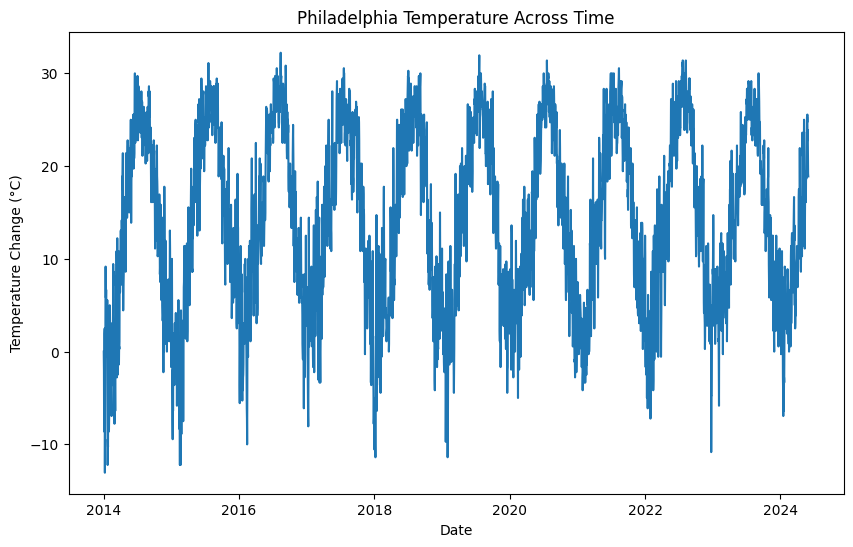

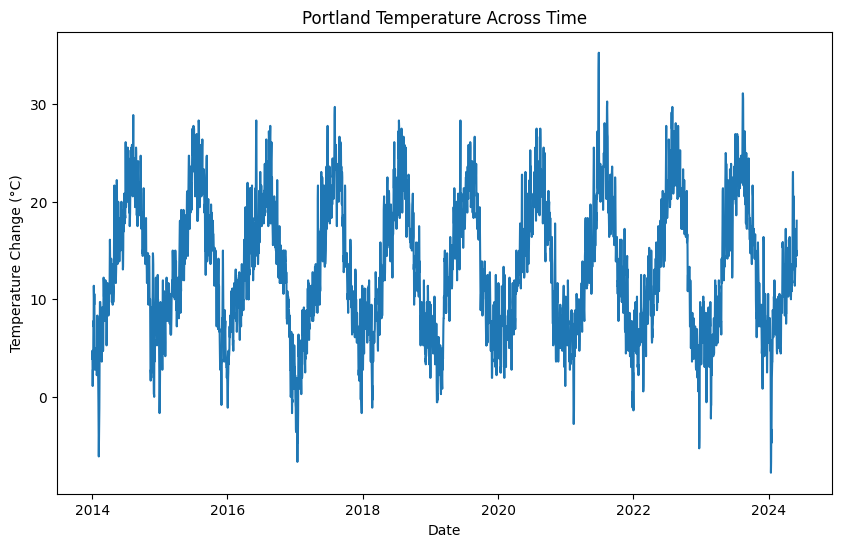

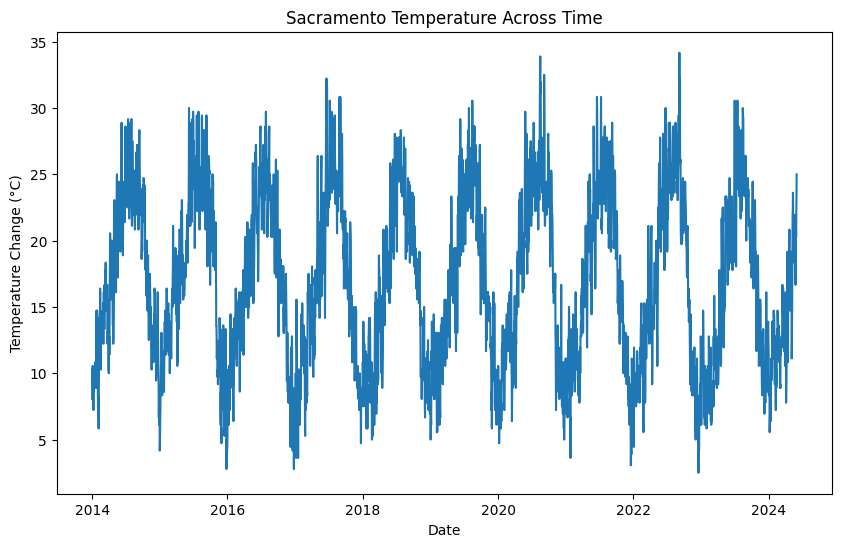

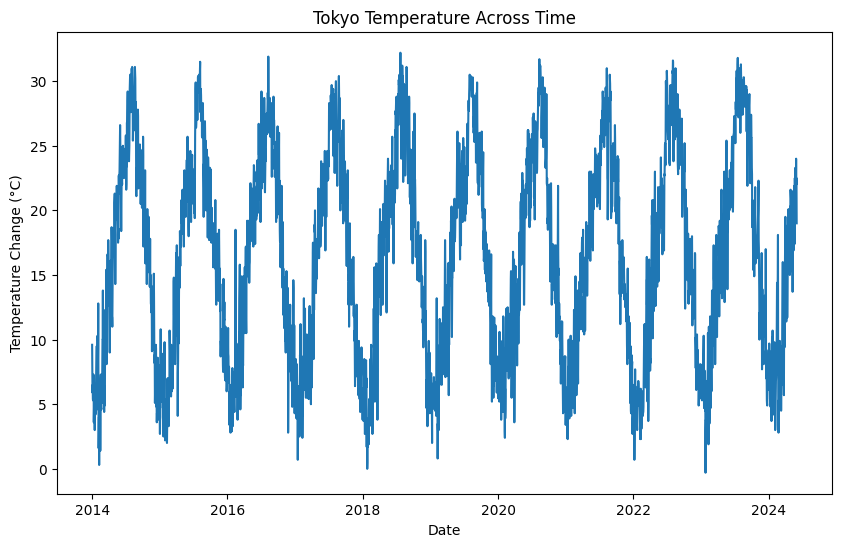

In [14]:
for city in t_avg.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(t_avg.index, t_avg[city], label=f'{city}')
    plt.xlabel('Date')
    plt.ylabel('Temperature Change (°C)')
    plt.title(f'{city} Temperature Across Time')
    plt.show()

count    258.000000
mean      14.740310
std       14.202756
min        1.000000
25%        3.000000
50%        9.000000
75%       24.750000
max       53.000000
Name: count, dtype: float64
count     74.000000
mean      51.391892
std       64.124839
min        1.000000
25%        7.250000
50%       23.000000
75%       68.750000
max      235.000000
Name: count, dtype: float64
count     87.000000
mean      43.712644
std       44.316753
min        1.000000
25%        5.500000
50%       25.000000
75%       74.500000
max      153.000000
Name: count, dtype: float64
count     54.000000
mean      70.425926
std       85.763079
min        1.000000
25%        5.000000
50%       28.000000
75%      129.250000
max      274.000000
Name: count, dtype: float64
count     93.000000
mean      40.892473
std       45.876598
min        1.000000
25%        5.000000
50%       20.000000
75%       60.000000
max      157.000000
Name: count, dtype: float64
count     96.000000
mean      39.614583
std       47.905910


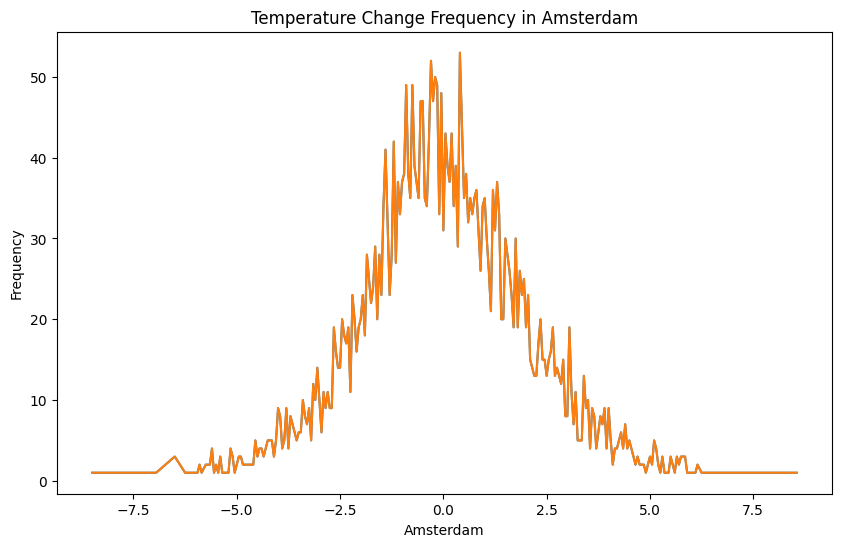

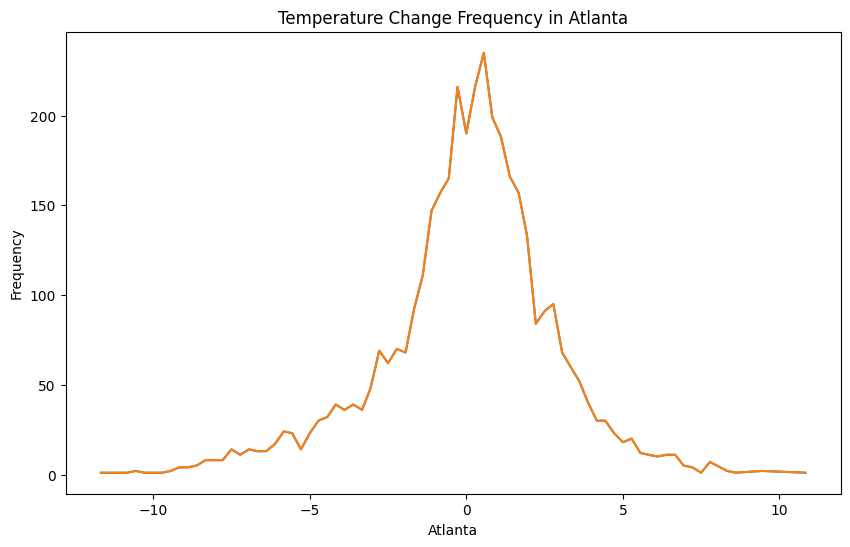

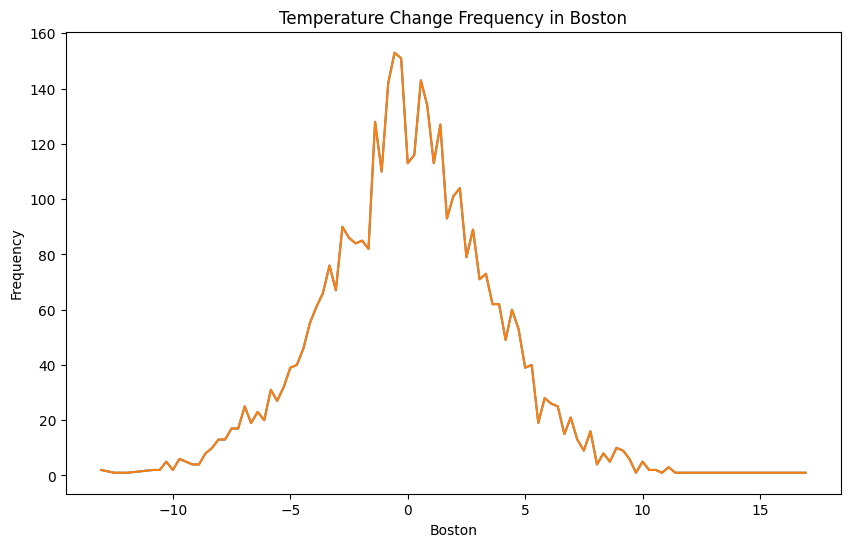

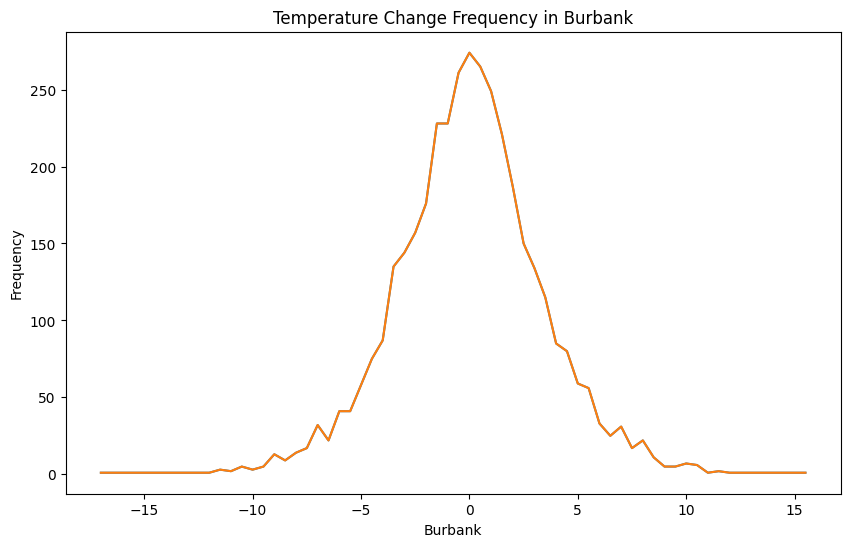

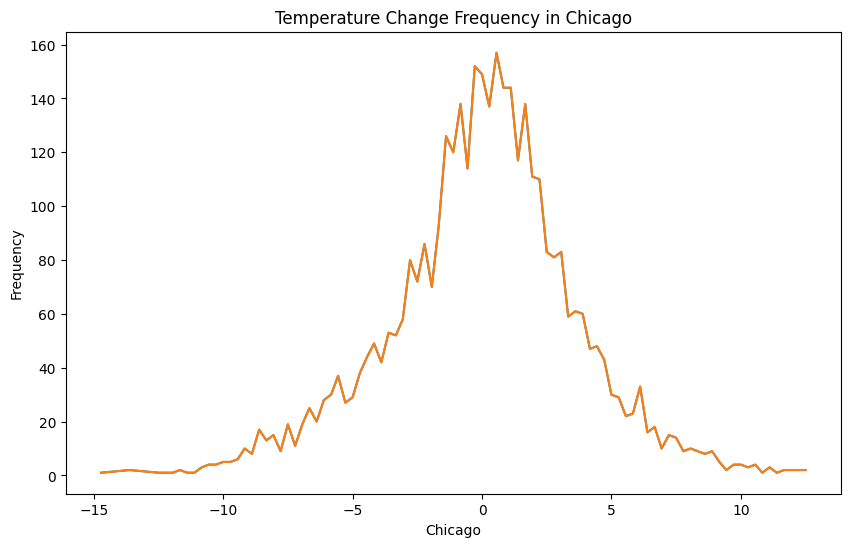

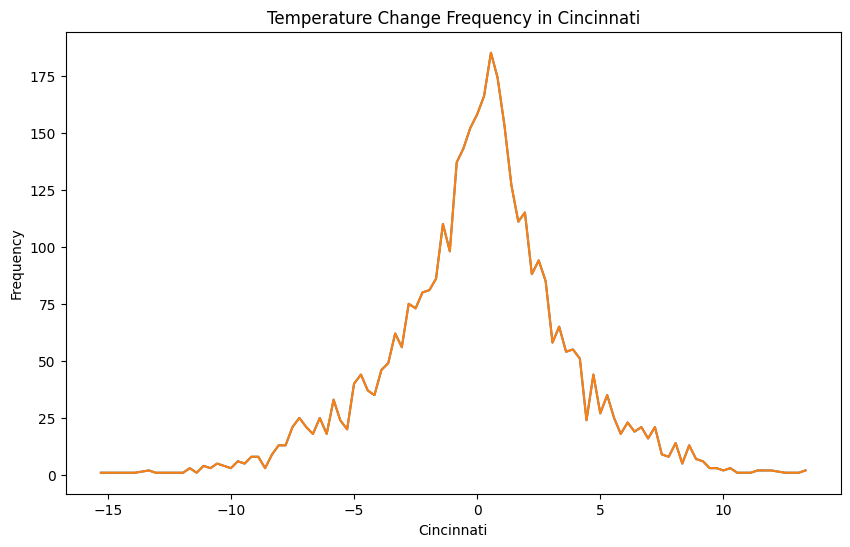

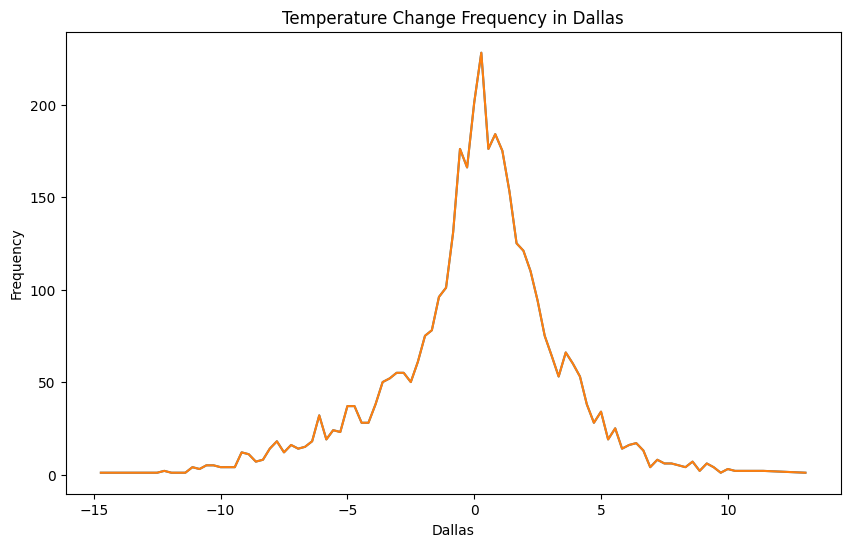

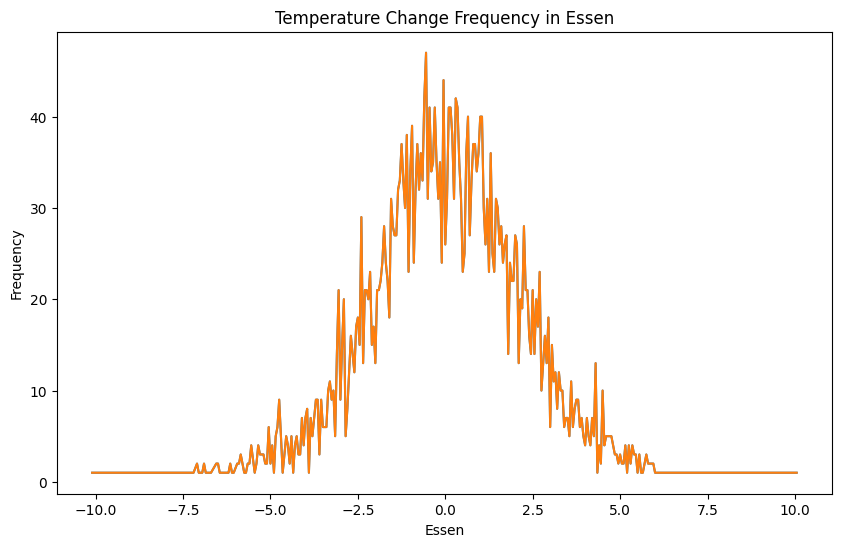

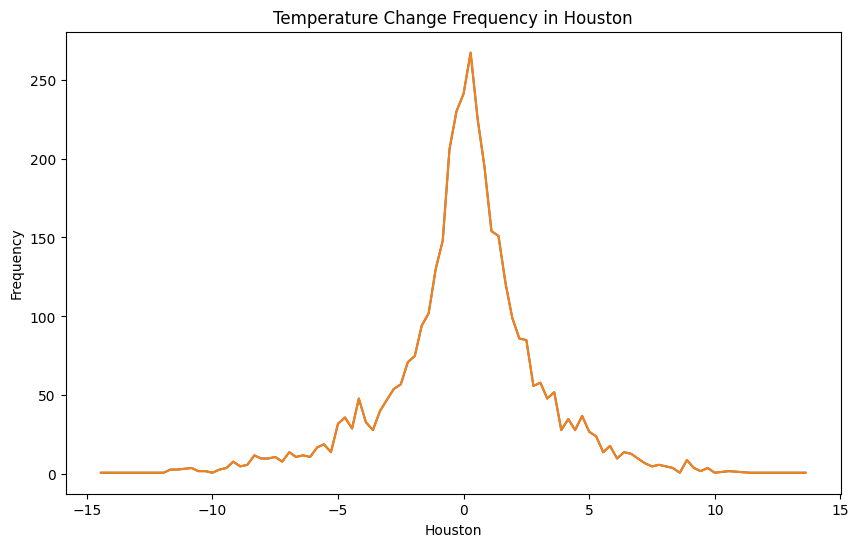

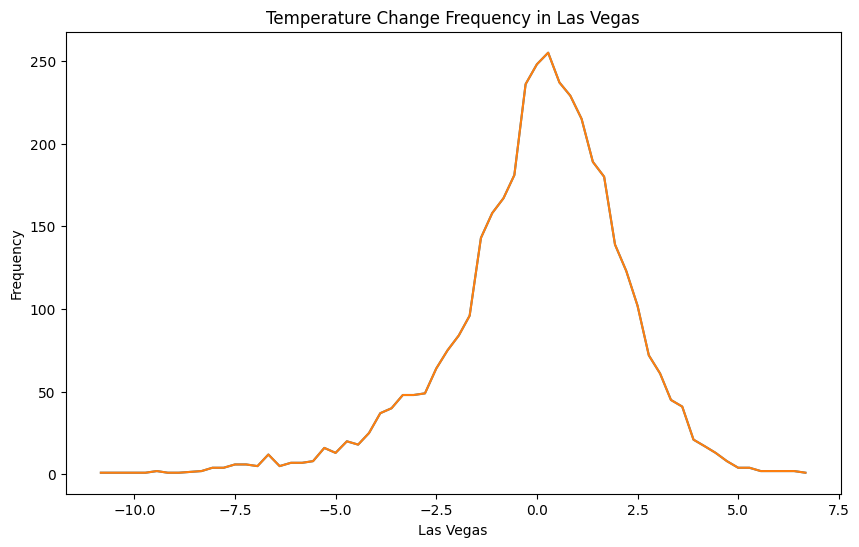

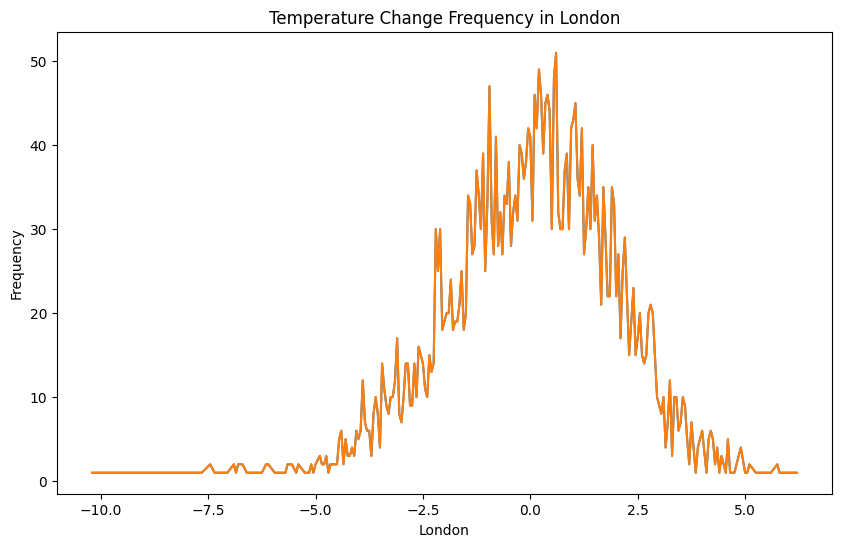

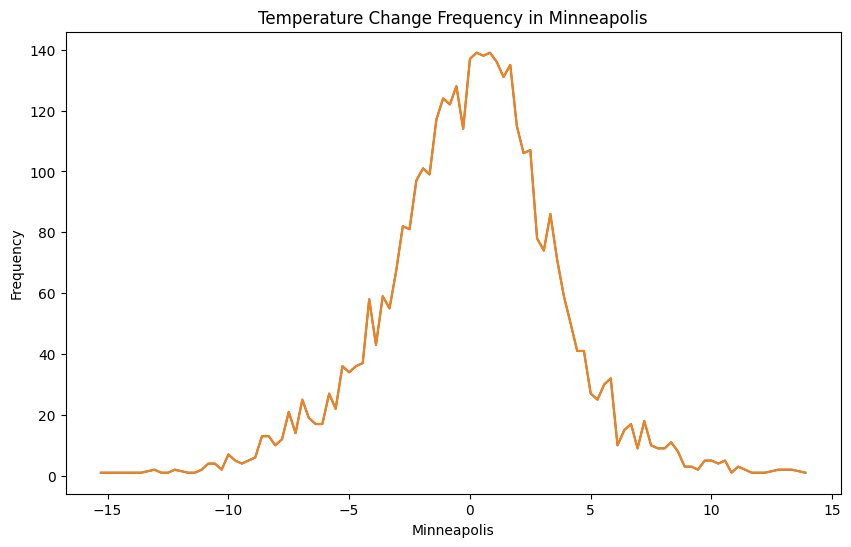

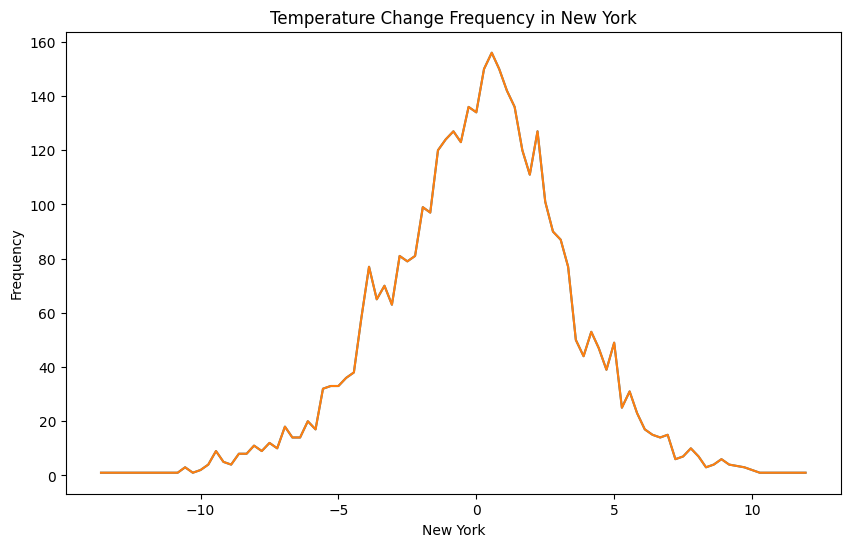

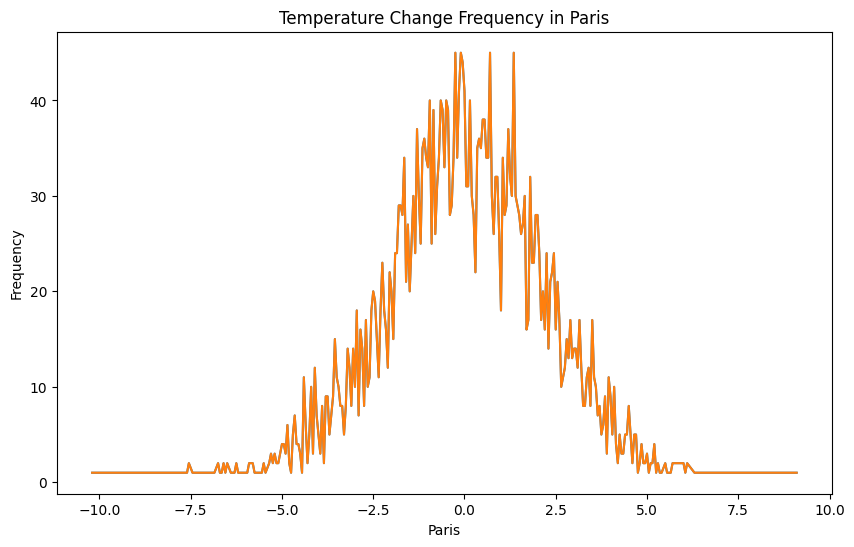

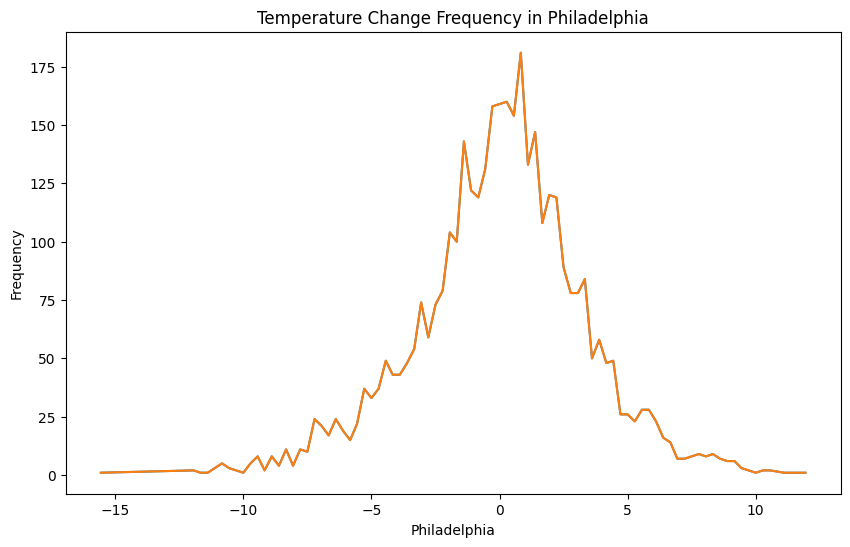

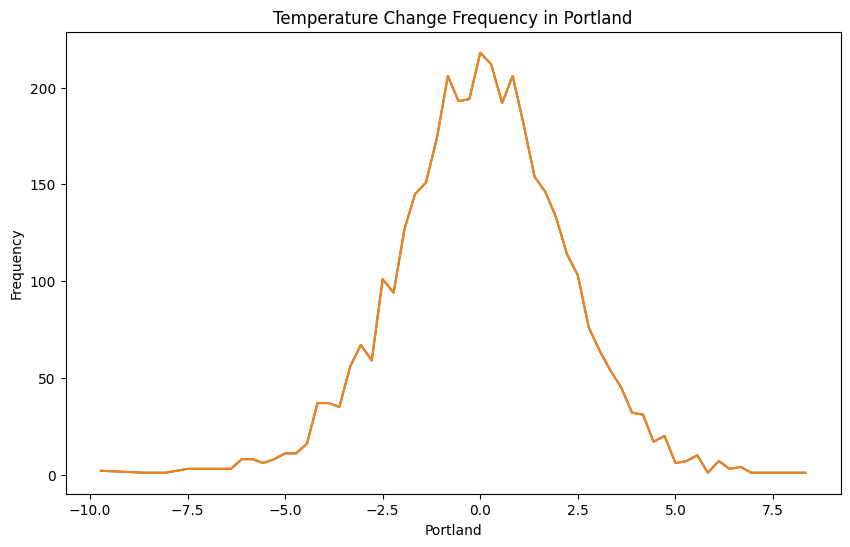

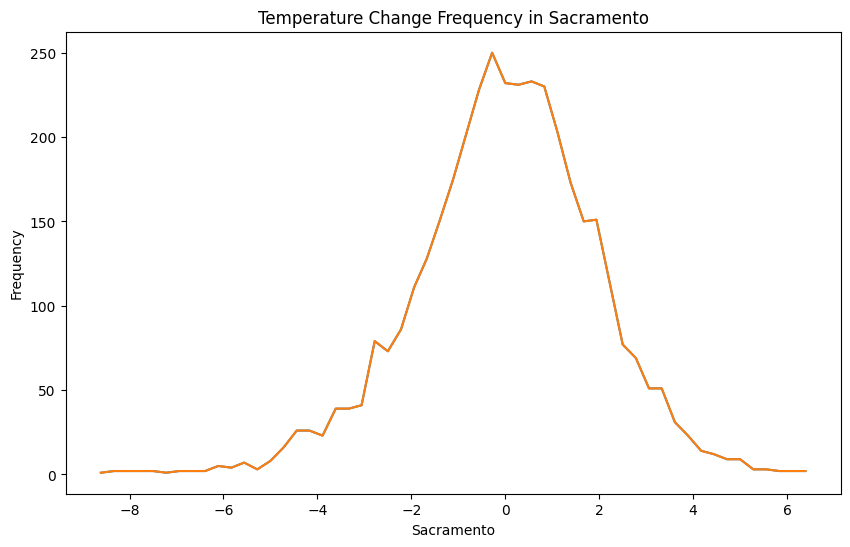

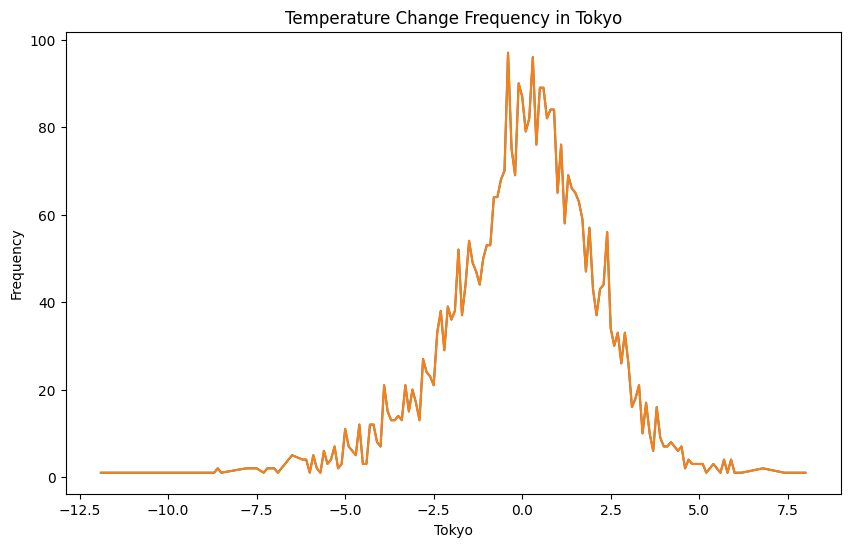

In [15]:
for city in t_change.columns:
    t_change_counts = pd.Series(t_change[city]).value_counts().sort_index()
    print(t_change_counts.describe())
    plt.figure(figsize=(10, 6))
    plt.plot(t_change_counts.index, t_change_counts.values)
    plt.xlabel('Temperature Change (°C)')
    plt.ylabel('Frequency')
    t_change_counts.plot()
    plt.title(f'Temperature Change Frequency in {city}')

In [ ]:
for city in t_change.columns:
    t_statistic, p_value = stats.ttest_1samp(t_change[city], 0)
    print(f'{city}: t-statistic = {t_statistic}, p-value = {p_value}')
    kurtosis_value = stats.kurtosis(t_change[city])
    skewness_value = stats.skew(t_change[city])
    print(f'{city}: Kurtosis = {kurtosis_value}, Skewness = {skewness_value}')
    print('')

Amsterdam: t-statistic = 0.07728219669754981, p-value = 0.9384031200366449
Amsterdam: Kurtosis = 0.7230435495115577, Skewness = 0.05693902755266176

Atlanta: t-statistic = 0.10653984593703646, p-value = 0.9151596636658901
Atlanta: Kurtosis = 1.311713131194586, Skewness = -0.524520257689656

Boston: t-statistic = 0.1032032800138186, p-value = 0.9178070797036872
Boston: Kurtosis = 0.40240229584130915, Skewness = -0.012747389546287171

Burbank: t-statistic = 0.024207409800248054, p-value = 0.9806884380643941
Burbank: Kurtosis = 0.9375815478573362, Skewness = -0.012274602399239866

Chicago: t-statistic = 0.12081897125630052, p-value = 0.9038408075815013
Chicago: Kurtosis = 0.7437352468134493, Skewness = -0.15949366281388586

Cincinnati: t-statistic = 0.07532743763132854, p-value = 0.9399581544935791
Cincinnati: Kurtosis = 1.0266526617835678, Skewness = -0.19282530011865365

Dallas: t-statistic = 0.06926326321778352, p-value = 0.9447837096355438
Dallas: Kurtosis = 1.4153884493471987, Skewne

In [17]:
for city in t_change.columns:
    
    # Fit Gaussian Distribution
    params_gaussian = norm.fit(t_change[city])
    log_likelihood_gaussian = np.sum(norm.logpdf(t_change[city], *params_gaussian))
    aic_gaussian = 2*len(params_gaussian) - 2*log_likelihood_gaussian
    bic_gaussian = np.log(len(t_change[city]))*len(params_gaussian) - 2*log_likelihood_gaussian
    print(f'{city}: Gaussian AIC = {aic_gaussian}, BIC = {bic_gaussian}')
    
    # Fit Gumbel Distribution
    params_gumbel = gumbel_r.fit(t_change[city])
    log_likelihood_gumbel = np.sum(gumbel_r.logpdf(t_change[city], *params_gumbel))
    aic_gumbel = 2*len(params_gumbel) - 2*log_likelihood_gumbel
    bic_gumbel = np.log(len(t_change[city]))*len(params_gumbel) - 2*log_likelihood_gumbel
    print(f'{city}: Gumbel AIC = {aic_gumbel}, BIC = {bic_gumbel}')
    
    # Fit Student's t Distribution
    params_t = t.fit(t_change[city])
    log_likelihood_t = np.sum(t.logpdf(t_change[city], *params_t))
    aic_t = 2*len(params_t) - 2*log_likelihood_t
    bic_t = np.log(len(t_change[city]))*len(params_t) - 2*log_likelihood_t
    print(f'{city}: Student\'s t AIC = {aic_t}, BIC = {bic_t}')
    
    print('')


Amsterdam: Gaussian AIC = 16355.840546931806, BIC = 16368.327637947663
Amsterdam: Gumbel AIC = 17131.48699513347, BIC = 17143.974086149326


Amsterdam: Student's t AIC = 16295.751994244658, BIC = 16314.482630768443

Atlanta: Gaussian AIC = 18431.404539355623, BIC = 18443.89163037148
Atlanta: Gumbel AIC = 19820.688858252346, BIC = 19833.175949268203
Atlanta: Student's t AIC = 18192.0819931925, BIC = 18210.812629716285

Boston: Gaussian AIC = 20497.688342619585, BIC = 20510.175433635442
Boston: Gumbel AIC = 21218.030178574663, BIC = 21230.51726959052
Boston: Student's t AIC = 20477.302501781505, BIC = 20496.03313830529

Burbank: Gaussian AIC = 19989.28754610318, BIC = 20001.774637119037
Burbank: Gumbel AIC = 20915.4933840074, BIC = 20927.980475023258
Burbank: Student's t AIC = 19902.309995326286, BIC = 19921.04063185007

Chicago: Gaussian AIC = 20585.552089459932, BIC = 20598.03918047579
Chicago: Gumbel AIC = 21539.556746254042, BIC = 21552.0438372699
Chicago: Student's t AIC = 20499.719977303517, BIC = 20518.450613827303

Cincinnati: Gaussian AIC = 20481.99748191447, BIC = 20494.484572930327
Cincinnati: Gumbel AIC = 21547.06

In [18]:
change_correlation = t_change.corr()
change_correlation

Amsterdam   Atlanta    Boston   Burbank   Chicago  Cincinnati  \
Amsterdam      1.000000  0.017067  0.005686 -0.003313  0.008997    0.001646   
Atlanta        0.017067  1.000000  0.253153 -0.025796  0.155381    0.452957   
Boston         0.005686  0.253153  1.000000  0.003520 -0.050352    0.168345   
Burbank       -0.003313 -0.025796  0.003520  1.000000 -0.102988   -0.067650   
Chicago        0.008997  0.155381 -0.050352 -0.102988  1.000000    0.581065   
Cincinnati     0.001646  0.452957  0.168345 -0.067650  0.581065    1.000000   
Dallas         0.017626  0.101813 -0.019590 -0.116675  0.409262    0.371840   
Essen          0.737894  0.012037 -0.008804 -0.027459  0.030596    0.014807   
Houston        0.004974  0.347745  0.080921 -0.074008  0.326248    0.454874   
Las Vegas      0.020366 -0.136339 -0.044942  0.258531 -0.042823   -0.116797   
London         0.502211 -0.000263 -0.005740  0.016509 -0.017631   -0.005050   
Minneapolis    0.034753 -0.070628 -0.233919 -0.079942  0.488146    0.141063   
New York      -0.002262  0.351793  0.812467 -0.007712  0.005934    0.285105   
Paris          0.493059 -0.012080 -0.017104 -0.007046  0.017270    0.010581   
Philadelphia  -0.001081  0.402484  0.701515  0.008740 -0.032093    0.296257   
Portland      -0.006553  0.023503  0.019465  0.152694 -0.003382    0.018733   
Sacramento     0.020904 -0.050364 -0.005455  0.274614 -0.044714   -0.050041   
Tokyo          0.022835 -0.007568 -0.004079 -0.015259  0.026185    0.009977   

                Dallas     Essen   Houston  Las Vegas    London  Minneapolis  \
Amsterdam     0.017626  0.737894  0.004974   0.020366  0.502211     0.034753   
Atlanta       0.101813  0.012037  0.347745  -0.136339 -0.000263    -0.070628   
Boston       -0.019590 -0.008804  0.080921  -0.044942 -0.005740    -0.233919   
Burbank      -0.116675 -0.027459 -0.074008   0.258531  0.016509    -0.079942   
Chicago       0.409262  0.030596  0.326248  -0.042823 -0.017631     0.488146   
Cincinnati    0.371840  0.014807  0.454874  -0.116797 -0.005050     0.141063   
Dallas        1.000000  0.025002  0.599000   0.004596  0.023111     0.271151   
Essen         0.025002  1.000000  0.005223  -0.002159  0.452470     0.021185   
Houston       0.599000  0.005223  1.000000  -0.068405  0.016147     0.080276   
Las Vegas     0.004596 -0.002159 -0.068405   1.000000  0.029114     0.021895   
London        0.023111  0.452470  0.016147   0.029114  1.000000    -0.015196   
Minneapolis   0.271151  0.021185  0.080276   0.021895 -0.015196     1.000000   
New York      0.007453 -0.021259  0.140311  -0.071085 -0.012178    -0.211084   
Paris         0.041016  0.556049  0.022868   0.010259  0.458746     0.016340   
Philadelphia -0.033083 -0.023632  0.113938  -0.070445 -0.020019    -0.252889   
Portland     -0.059608  0.004467 -0.045329   0.022287  0.026835    -0.031297   
Sacramento   -0.068376 -0.005511 -0.075801   0.195972  0.019546    -0.024199   
Tokyo         0.021514  0.021731  0.003947  -0.001762  0.004998     0.028956   

              New York     Paris  Philadelphia  Portland  Sacramento     Tokyo  
Amsterdam    -0.002262  0.493059     -0.001081 -0.006553    0.020904  0.022835  
Atlanta       0.351793 -0.012080      0.402484  0.023503   -0.050364 -0.007568  
Boston        0.812467 -0.017104      0.701515  0.019465   -0.005455 -0.004079  
Burbank      -0.007712 -0.007046      0.008740  0.152694    0.274614 -0.015259  
Chicago       0.005934  0.017270     -0.032093 -0.003382   -0.044714  0.026185  
Cincinnati    0.285105  0.010581      0.296257  0.018733   -0.050041  0.009977  
Dallas        0.007453  0.041016     -0.033083 -0.059608   -0.068376  0.021514  
Essen        -0.021259  0.556049     -0.023632  0.004467   -0.005511  0.021731  
Houston       0.140311  0.022868      0.113938 -0.045329   -0.075801  0.003947  
Las Vegas    -0.071085  0.010259     -0.070445  0.022287    0.195972 -0.001762  
London       -0.012178  0.458746     -0.020019  0.026835    0.019546  0.004998  
Minneapolis  -0.211

# Heatmap of Temperature Correlation

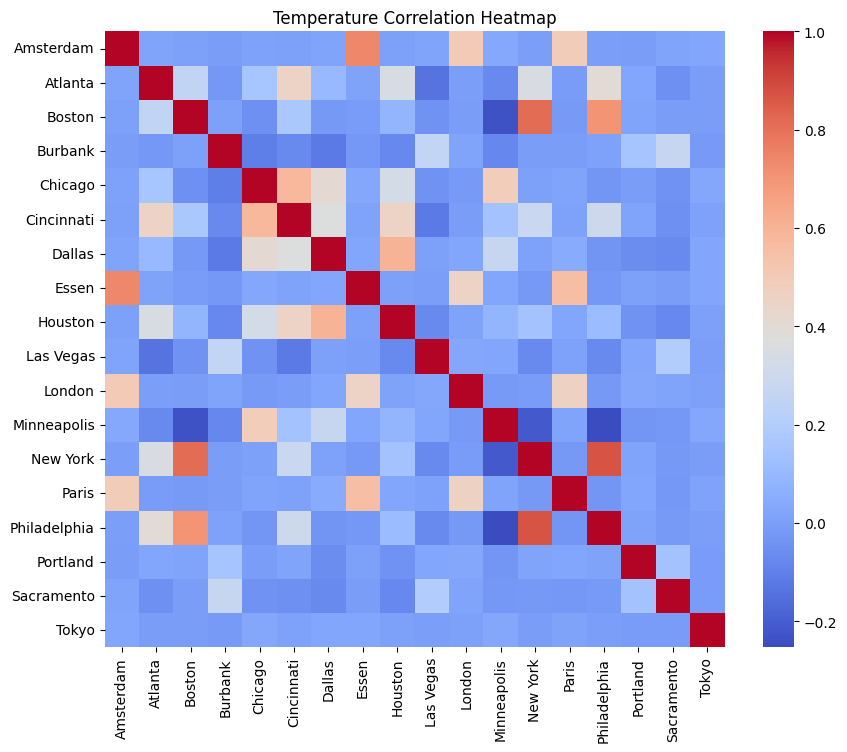

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(change_correlation, annot= False, cmap='coolwarm')
plt.title('Temperature Correlation Heatmap')
plt.show()

In [20]:
# Fit AR model with seasonal component

for city in t_avg.columns:
    model = sm.tsa.statespace.SARIMAX(t_avg[city], order=(3, 1, 1), seasonal_order=(3, 1, 1, 12))
    results = model.fit()
    print(results.summary())
    print('')

# Heatmap of temperature change correlation
# Seasonal component - Refer to the book for the cosine function
# White noise
# Check the contract for the pricing
    

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27506D+00    |proj g|=  1.34086D-01


 This problem is unconstrained.



At iterate    5    f=  2.21136D+00    |proj g|=  3.99733D-02

At iterate   10    f=  2.15114D+00    |proj g|=  6.40203D-02

At iterate   15    f=  2.11187D+00    |proj g|=  2.44959D-02

At iterate   20    f=  2.10908D+00    |proj g|=  2.92316D-03

At iterate   25    f=  2.10672D+00    |proj g|=  8.88517D-03

At iterate   30    f=  2.10614D+00    |proj g|=  2.66476D-03

At iterate   35    f=  2.10610D+00    |proj g|=  4.34011D-04

At iterate   40    f=  2.10609D+00    |proj g|=  3.66707D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     47      1     0     0   8.699D-06   2.106D+00
  F =   2.10609347648

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51940D+00    |proj g|=  1.01217D-01

At iterate    5    f=  2.46371D+00    |proj g|=  2.74655D-02

At iterate   10    f=  2.42177D+00    |proj g|=  1.76005D-01

At iterate   15    f=  2.34992D+00    |proj g|=  3.52688D-02

At iterate   20    f=  2.34359D+00    |proj g|=  5.06954D-03

At iterate   25    f=  2.33888D+00    |proj g|=  1.13617D-02

At iterate   30    f=  2.33823D+00    |proj g|=  2.01173D-03

At iterate   35    f=  2.33813D+00    |proj g|=  1.56882D-03

At iterate   40    f=  2.33811D+00    |proj g|=  2.62040D-04

At iterate   45    f=  2.33811D+00    |proj g|=  1.23596D-04

At iterate   50    f=  2.33811D+00    |proj g|=  1.32729D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                            Atlanta   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -8894.162
Date:                            Thu, 06 Feb 2025   AIC                          17806.325
Time:                                    08:12:55   BIC                          17862.488
Sample:                                01-01-2014   HQIC                         17826.288
                                     - 05-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9197      0.019     47.739      0.000       0.882       0.957
ar.L2         -0.3784      0.018   

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79114D+00    |proj g|=  7.84938D-02

At iterate    5    f=  2.70689D+00    |proj g|=  6.69021D-02

At iterate   10    f=  2.61207D+00    |proj g|=  2.96118D-02

At iterate   15    f=  2.60360D+00    |proj g|=  1.24631D-02

At iterate   20    f=  2.59927D+00    |proj g|=  1.67918D-02

At iterate   25    f=  2.59739D+00    |proj g|=  7.72691D-03

At iterate   30    f=  2.59725D+00    |proj g|=  5.79519D-04

At iterate   35    f=  2.59724D+00    |proj g|=  2.86455D-04

At iterate   40    f=  2.59724D+00    |proj g|=  1.79826D-04

At iterate   45    f=  2.59724D+00    |proj g|=  1.01236D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73768D+00    |proj g|=  8.36813D-02


 This problem is unconstrained.



At iterate    5    f=  2.65424D+00    |proj g|=  6.00286D-02

At iterate   10    f=  2.59665D+00    |proj g|=  5.04517D-02

At iterate   15    f=  2.56637D+00    |proj g|=  1.26730D-02

At iterate   20    f=  2.56547D+00    |proj g|=  3.56226D-03

At iterate   25    f=  2.56396D+00    |proj g|=  6.49122D-03

At iterate   30    f=  2.56374D+00    |proj g|=  1.39019D-03

At iterate   35    f=  2.56367D+00    |proj g|=  1.23068D-03

At iterate   40    f=  2.56366D+00    |proj g|=  3.45456D-04

At iterate   45    f=  2.56366D+00    |proj g|=  6.15688D-05


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.56366D+00    |proj g|=  8.37062D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     54      1     0     0   8.371D-05   2.564D+00
  F =   2.5636580879282009     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                            Burbank   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -9752.155
Date:                            Thu, 06 Feb 2025   AIC                          19522.3

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80868D+00    |proj g|=  7.71697D-02


 This problem is unconstrained.



At iterate    5    f=  2.72655D+00    |proj g|=  4.25049D-02

At iterate   10    f=  2.67106D+00    |proj g|=  1.01270D-01

At iterate   15    f=  2.63507D+00    |proj g|=  4.05679D-02

At iterate   20    f=  2.63119D+00    |proj g|=  3.02988D-03

At iterate   25    f=  2.62979D+00    |proj g|=  9.31442D-03

At iterate   30    f=  2.62900D+00    |proj g|=  2.82364D-03

At iterate   35    f=  2.62893D+00    |proj g|=  7.37782D-04

At iterate   40    f=  2.62892D+00    |proj g|=  8.68733D-04

At iterate   45    f=  2.62892D+00    |proj g|=  5.53138D-05


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.62892D+00    |proj g|=  6.22814D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   6.228D-05   2.629D+00
  F =   2.6289174090911023     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                            Chicago   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood              -10000.402
Date:                            Thu, 06 Feb 2025   AIC                          20018.8

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79168D+00    |proj g|=  7.76800D-02

At iterate    5    f=  2.72320D+00    |proj g|=  4.41623D-02

At iterate   10    f=  2.63820D+00    |proj g|=  4.53148D-02

At iterate   15    f=  2.61126D+00    |proj g|=  1.94752D-02

At iterate   20    f=  2.60985D+00    |proj g|=  8.56701D-03

At iterate   25    f=  2.60708D+00    |proj g|=  5.18642D-03

At iterate   30    f=  2.60671D+00    |proj g|=  1.24518D-03

At iterate   35    f=  2.60665D+00    |proj g|=  1.45132D-03

At iterate   40    f=  2.60664D+00    |proj g|=  6.73335D-04

At iterate   45    f=  2.60664D+00    |proj g|=  2.43267D-04


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.60664D+00    |proj g|=  1.46188D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   1.462D-04   2.607D+00
  F =   2.6066381666400473     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                         Cincinnati   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -9915.652
Date:                            Thu, 06 Feb 2025   AIC                          19849.3

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70880D+00    |proj g|=  8.38273D-02


 This problem is unconstrained.



At iterate    5    f=  2.63248D+00    |proj g|=  8.47452D-02

At iterate   10    f=  2.54621D+00    |proj g|=  5.48898D-02

At iterate   15    f=  2.53398D+00    |proj g|=  6.13021D-03

At iterate   20    f=  2.52888D+00    |proj g|=  1.08505D-02

At iterate   25    f=  2.52820D+00    |proj g|=  6.23239D-03

At iterate   30    f=  2.52808D+00    |proj g|=  5.70674D-04

At iterate   35    f=  2.52806D+00    |proj g|=  3.25632D-04

At iterate   40    f=  2.52806D+00    |proj g|=  1.57342D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     49      1     0     0   7.282D-05   2.528D+00
  F =   2.52805995116

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34965D+00    |proj g|=  1.27455D-01


 This problem is unconstrained.



At iterate    5    f=  2.26810D+00    |proj g|=  1.37399D-01

At iterate   10    f=  2.20009D+00    |proj g|=  3.58923D-02

At iterate   15    f=  2.18216D+00    |proj g|=  2.31825D-02

At iterate   20    f=  2.18018D+00    |proj g|=  3.04255D-04

At iterate   25    f=  2.18017D+00    |proj g|=  2.02404D-03

At iterate   30    f=  2.18010D+00    |proj g|=  7.27768D-04

At iterate   35    f=  2.18009D+00    |proj g|=  2.06268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37     40      1     0     0   1.442D-05   2.180D+00
  F =   2.1800895645630156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60105D+00    |proj g|=  9.71812D-02


 This problem is unconstrained.



At iterate    5    f=  2.51915D+00    |proj g|=  6.34448D-02

At iterate   10    f=  2.45404D+00    |proj g|=  6.06986D-02

At iterate   15    f=  2.42195D+00    |proj g|=  1.92948D-02

At iterate   20    f=  2.42031D+00    |proj g|=  1.19758D-02

At iterate   25    f=  2.41667D+00    |proj g|=  4.32485D-03

At iterate   30    f=  2.41631D+00    |proj g|=  6.78463D-04

At iterate   35    f=  2.41627D+00    |proj g|=  3.57297D-04

At iterate   40    f=  2.41626D+00    |proj g|=  3.47113D-04

At iterate   45    f=  2.41626D+00    |proj g|=  1.38097D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     56   

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28770D+00    |proj g|=  1.27002D-01


 This problem is unconstrained.



At iterate    5    f=  2.21782D+00    |proj g|=  1.19281D-01

At iterate   10    f=  2.14216D+00    |proj g|=  2.52093D-02

At iterate   15    f=  2.12517D+00    |proj g|=  8.63286D-03

At iterate   20    f=  2.12440D+00    |proj g|=  1.65725D-02

At iterate   25    f=  2.12242D+00    |proj g|=  2.85706D-03

At iterate   30    f=  2.12235D+00    |proj g|=  5.12497D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     37      1     0     0   2.520D-05   2.122D+00
  F =   2.1223546888534646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Result

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23871D+00    |proj g|=  1.39471D-01

At iterate    5    f=  2.16512D+00    |proj g|=  1.05681D-01

At iterate   10    f=  2.09944D+00    |proj g|=  3.43632D-02

At iterate   15    f=  2.07017D+00    |proj g|=  3.20482D-02

At iterate   20    f=  2.06678D+00    |proj g|=  1.79216D-03

At iterate   25    f=  2.06599D+00    |proj g|=  1.02610D-02

At iterate   30    f=  2.06565D+00    |proj g|=  1.88319D-03

At iterate   35    f=  2.06560D+00    |proj g|=  5.52412D-04

At iterate   40    f=  2.06560D+00    |proj g|=  4.51375D-04

At iterate   45    f=  2.06560D+00    |proj g|=  2.60016D-05


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.06560D+00    |proj g|=  2.41953D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   2.420D-05   2.066D+00
  F =   2.0655972082951082     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                             London   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -7857.532
Date:                            Thu, 06 Feb 2025   AIC                          15733.0

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81222D+00    |proj g|=  7.85028D-02


 This problem is unconstrained.



At iterate    5    f=  2.72524D+00    |proj g|=  5.71258D-02

At iterate   10    f=  2.67155D+00    |proj g|=  2.68152D-02

At iterate   15    f=  2.64363D+00    |proj g|=  3.71377D-02

At iterate   20    f=  2.64082D+00    |proj g|=  6.92915D-04

At iterate   25    f=  2.64070D+00    |proj g|=  4.57273D-03

At iterate   30    f=  2.64048D+00    |proj g|=  5.28897D-04

At iterate   35    f=  2.64046D+00    |proj g|=  4.64347D-04

At iterate   40    f=  2.64046D+00    |proj g|=  3.68399D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     46      1     0     0   5.863D-06   2.640D+00
  F =   2.64046335815

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70612D+00    |proj g|=  8.65058D-02

At iterate    5    f=  2.62157D+00    |proj g|=  1.00820D-01

At iterate   10    f=  2.53163D+00    |proj g|=  5.24086D-02

At iterate   15    f=  2.52540D+00    |proj g|=  1.12188D-02

At iterate   20    f=  2.51934D+00    |proj g|=  1.50385D-02

At iterate   25    f=  2.51757D+00    |proj g|=  2.14910D-03

At iterate   30    f=  2.51745D+00    |proj g|=  1.69778D-03

At iterate   35    f=  2.51743D+00    |proj g|=  3.05178D-04

At iterate   40    f=  2.51742D+00    |proj g|=  8.85179D-05

At iterate   45    f=  2.51742D+00    |proj g|=  6.56886D-05


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.51742D+00    |proj g|=  5.84339D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   5.843D-05   2.517D+00
  F =   2.5174244369002259     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                           New York   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -9576.283
Date:                            Thu, 06 Feb 2025   AIC                          19170.5

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34441D+00    |proj g|=  1.26801D-01


 This problem is unconstrained.



At iterate    5    f=  2.26741D+00    |proj g|=  1.11493D-01

At iterate   10    f=  2.18720D+00    |proj g|=  4.89368D-02

At iterate   15    f=  2.17184D+00    |proj g|=  1.54472D-02

At iterate   20    f=  2.17151D+00    |proj g|=  6.04290D-03

At iterate   25    f=  2.17093D+00    |proj g|=  5.92309D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     29     33      1     0     0   7.849D-06   2.171D+00
  F =   2.1709293948161634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:        

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70905D+00    |proj g|=  8.48890D-02


 This problem is unconstrained.



At iterate    5    f=  2.64120D+00    |proj g|=  5.11227D-02

At iterate   10    f=  2.54156D+00    |proj g|=  4.17032D-02

At iterate   15    f=  2.53207D+00    |proj g|=  6.89319D-03

At iterate   20    f=  2.52672D+00    |proj g|=  1.31420D-02

At iterate   25    f=  2.52570D+00    |proj g|=  3.53300D-03

At iterate   30    f=  2.52559D+00    |proj g|=  7.87734D-04

At iterate   35    f=  2.52557D+00    |proj g|=  3.58399D-04

At iterate   40    f=  2.52557D+00    |proj g|=  4.74744D-05

At iterate   45    f=  2.52557D+00    |proj g|=  1.99087D-04


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.52557D+00    |proj g|=  2.03515D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   2.035D-05   2.526D+00
  F =   2.5255688311017419     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                       Philadelphia   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -9607.264
Date:                            Thu, 06 Feb 2025   AIC                          19232.5

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30519D+00    |proj g|=  1.23950D-01


 This problem is unconstrained.



At iterate    5    f=  2.23573D+00    |proj g|=  1.07054D-01

At iterate   10    f=  2.16044D+00    |proj g|=  3.20983D-02

At iterate   15    f=  2.13749D+00    |proj g|=  2.03844D-02

At iterate   20    f=  2.13584D+00    |proj g|=  1.08046D-02

At iterate   25    f=  2.13259D+00    |proj g|=  5.56809D-03

At iterate   30    f=  2.13224D+00    |proj g|=  7.74964D-04

At iterate   35    f=  2.13222D+00    |proj g|=  6.93015D-04

At iterate   40    f=  2.13221D+00    |proj g|=  1.09538D-04

At iterate   45    f=  2.13221D+00    |proj g|=  1.09547D-04


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.13221D+00    |proj g|=  1.83050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   1.831D-05   2.132D+00
  F =   2.1322099074938112     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                           Portland   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -8110.926
Date:                            Thu, 06 Feb 2025   AIC                          16239.8

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20314D+00    |proj g|=  1.41091D-01


 This problem is unconstrained.



At iterate    5    f=  2.13025D+00    |proj g|=  1.15930D-01

At iterate   10    f=  2.05187D+00    |proj g|=  3.60394D-02

At iterate   15    f=  2.02295D+00    |proj g|=  1.94580D-02

At iterate   20    f=  2.02186D+00    |proj g|=  6.41876D-03

At iterate   25    f=  2.01954D+00    |proj g|=  2.62310D-03

At iterate   30    f=  2.01939D+00    |proj g|=  1.42023D-03

At iterate   35    f=  2.01930D+00    |proj g|=  5.71367D-04

At iterate   40    f=  2.01928D+00    |proj g|=  1.17349D-04

At iterate   45    f=  2.01928D+00    |proj g|=  8.60013D-05


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.01928D+00    |proj g|=  1.03160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   1.032D-04   2.019D+00
  F =   2.0192815151548302     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                         Sacramento   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -7681.347
Date:                            Thu, 06 Feb 2025   AIC                          15380.6

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28998D+00    |proj g|=  1.25663D-01


 This problem is unconstrained.



At iterate    5    f=  2.22502D+00    |proj g|=  5.45107D-02

At iterate   10    f=  2.13680D+00    |proj g|=  6.70551D-02

At iterate   15    f=  2.12244D+00    |proj g|=  1.06480D-02

At iterate   20    f=  2.11272D+00    |proj g|=  9.29877D-03

At iterate   25    f=  2.11073D+00    |proj g|=  1.98310D-03

At iterate   30    f=  2.11056D+00    |proj g|=  3.53297D-04

At iterate   35    f=  2.11054D+00    |proj g|=  8.17422D-04

At iterate   40    f=  2.11054D+00    |proj g|=  1.18249D-04

At iterate   45    f=  2.11054D+00    |proj g|=  1.01112D-04


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.11054D+00    |proj g|=  8.53853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   8.539D-05   2.111D+00
  F =   2.1105389668716672     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                              Tokyo   No. Observations:                 3804
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -8028.490
Date:                            Thu, 06 Feb 2025   AIC                          16074.9

ADF Statistic: -4.200430383765481
p-value: 0.0006577957702408133
Order of differencing (d): 0


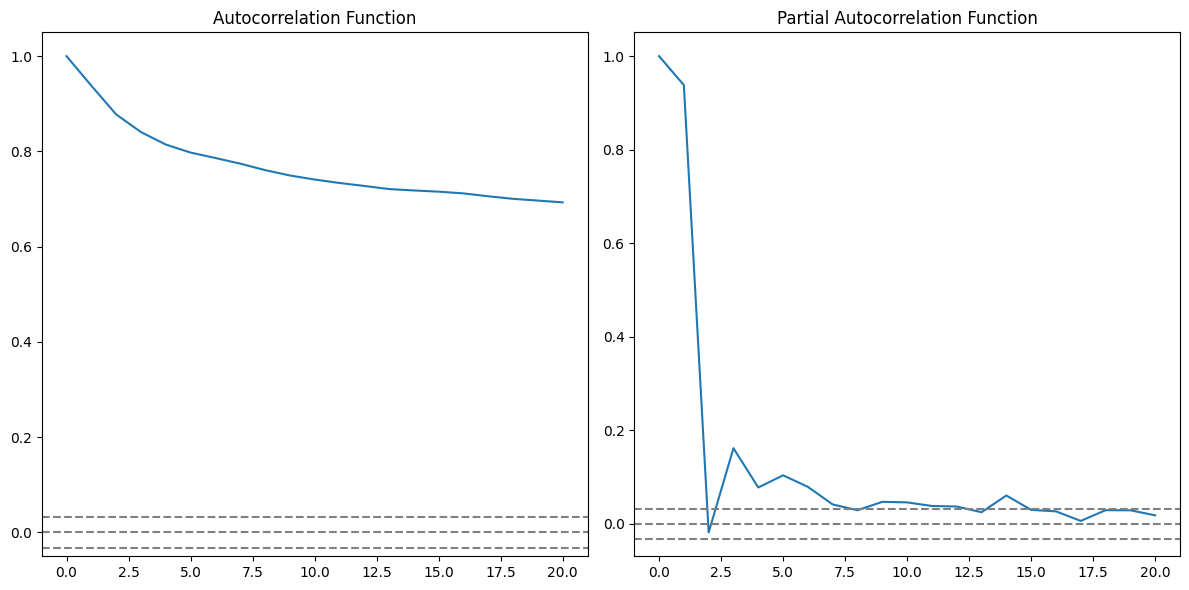

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Amsterdam   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8118.279
Date:                Thu, 06 Feb 2025   AIC                          16244.558
Time:                        08:31:24   BIC                          16269.533
Sample:                    01-01-2014   HQIC                         16253.433
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2128      0.528     21.251      0.000      10.179      12.247
ar.L1          0.9345      0.006    156.197      0.000       0.923       0.946
ma.L1          0.0298      0.017      1.757      0.0

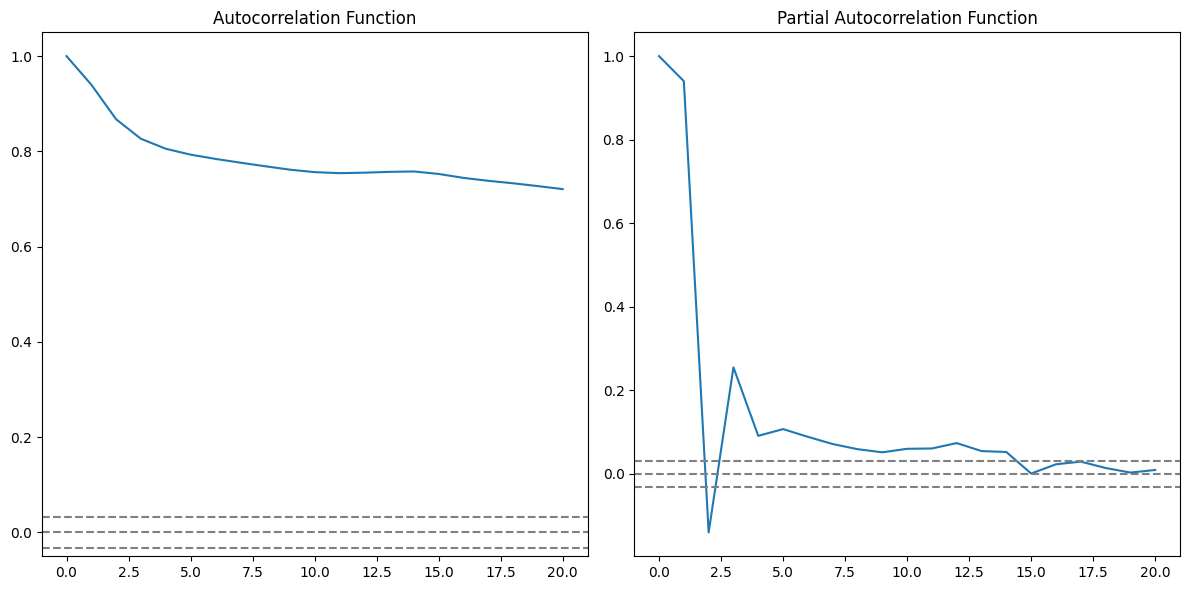

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Atlanta   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9091.464
Date:                Thu, 06 Feb 2025   AIC                          18190.927
Time:                        08:31:25   BIC                          18215.902
Sample:                    01-01-2014   HQIC                         18199.803
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1415      0.777     23.344      0.000      16.618      19.665
ar.L1          0.9113      0.008    113.262      0.000       0.896       0.927
ma.L1          0.2518      0.014     17.689      0.0

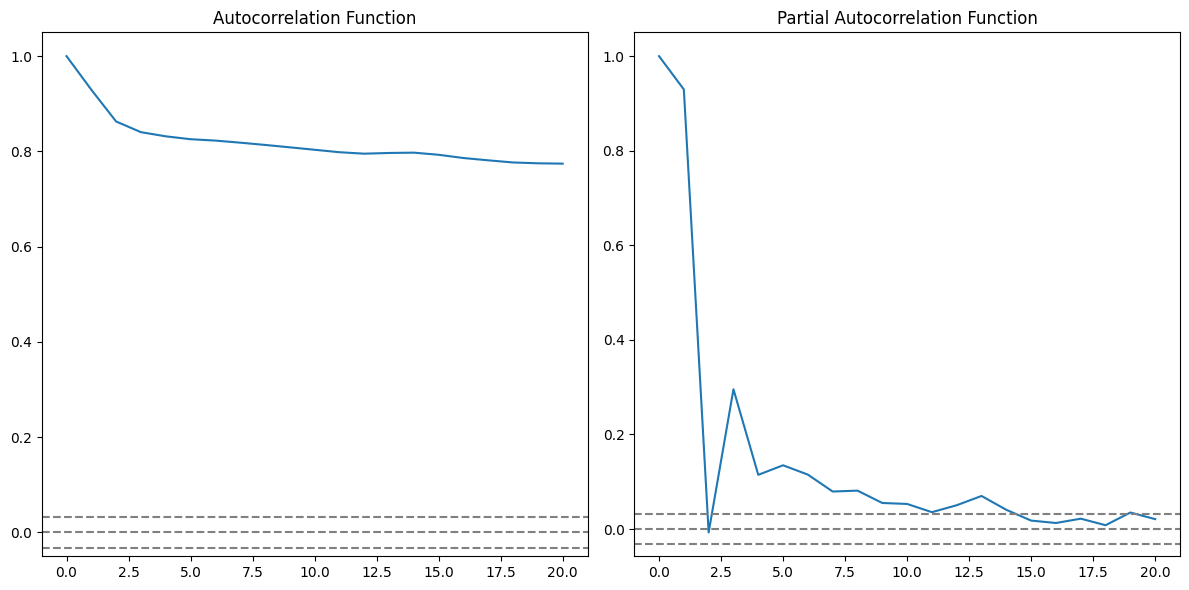

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Boston   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10182.832
Date:                Thu, 06 Feb 2025   AIC                          20373.664
Time:                        08:31:26   BIC                          20398.639
Sample:                    01-01-2014   HQIC                         20382.540
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5362      0.823     14.022      0.000       9.924      13.149
ar.L1          0.9272      0.007    142.088      0.000       0.914       0.940
ma.L1          0.0209      0.016      1.301      0.1

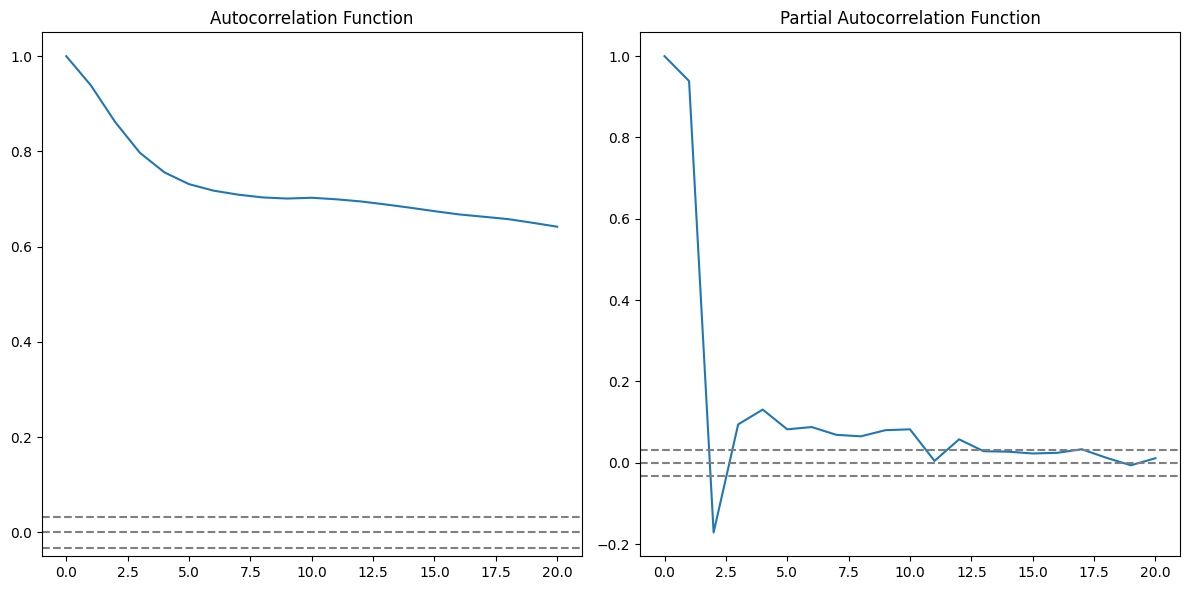

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Burbank   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9873.250
Date:                Thu, 06 Feb 2025   AIC                          19754.500
Time:                        08:31:27   BIC                          19779.475
Sample:                    01-01-2014   HQIC                         19763.376
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3864      0.752     88.333      0.000      64.913      67.859
ar.L1          0.9158      0.007    131.730      0.000       0.902       0.929
ma.L1          0.1986      0.016     12.776      0.0

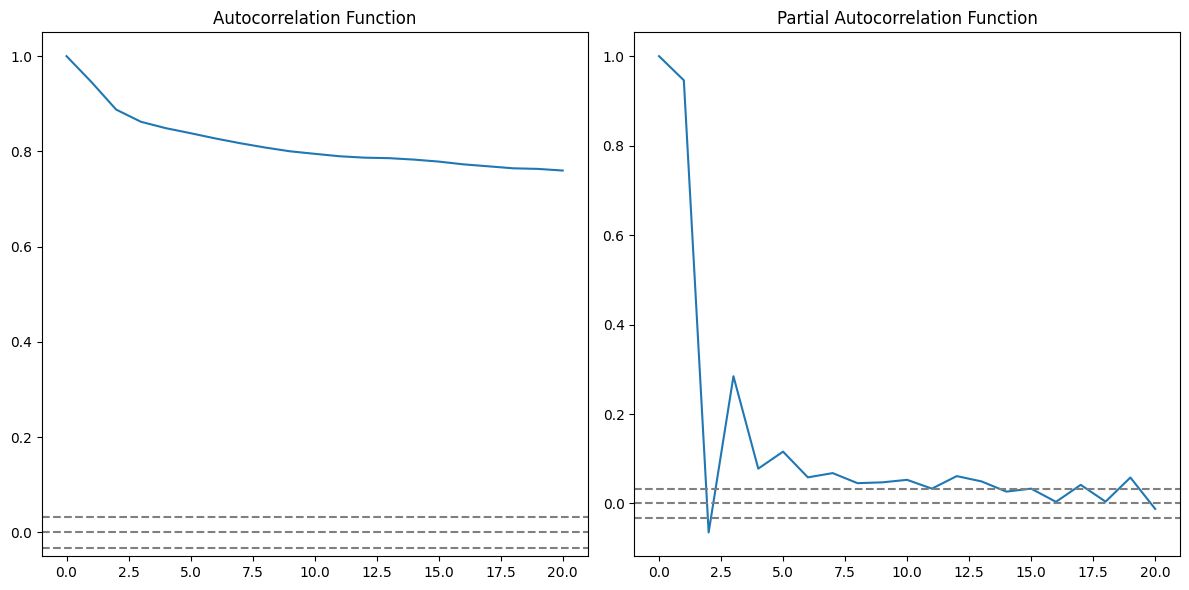

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Chicago   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10224.854
Date:                Thu, 06 Feb 2025   AIC                          20457.707
Time:                        08:31:28   BIC                          20482.682
Sample:                    01-01-2014   HQIC                         20466.583
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7539      1.022     10.520      0.000       8.750      12.758
ar.L1          0.9303      0.006    145.126      0.000       0.918       0.943
ma.L1          0.1511      0.014     10.455      0.0

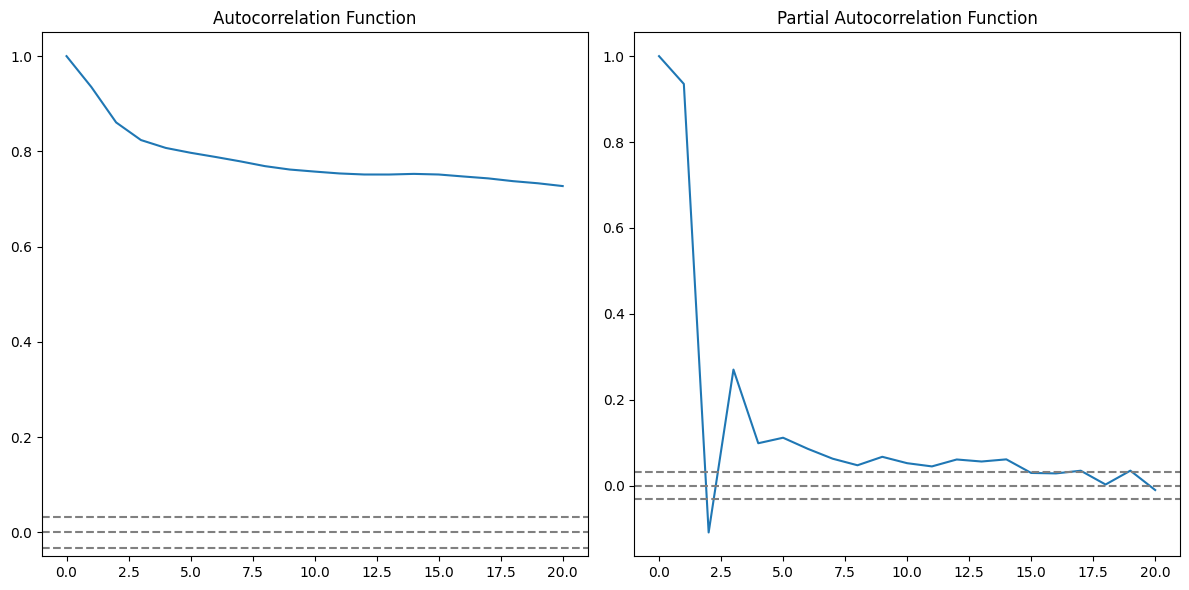

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Cincinnati   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10134.386
Date:                Thu, 06 Feb 2025   AIC                          20276.772
Time:                        08:31:29   BIC                          20301.747
Sample:                    01-01-2014   HQIC                         20285.647
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0114      0.871     14.946      0.000      11.305      14.718
ar.L1          0.9075      0.008    111.704      0.000       0.892       0.923
ma.L1          0.2187      0.014     15.722      0.0

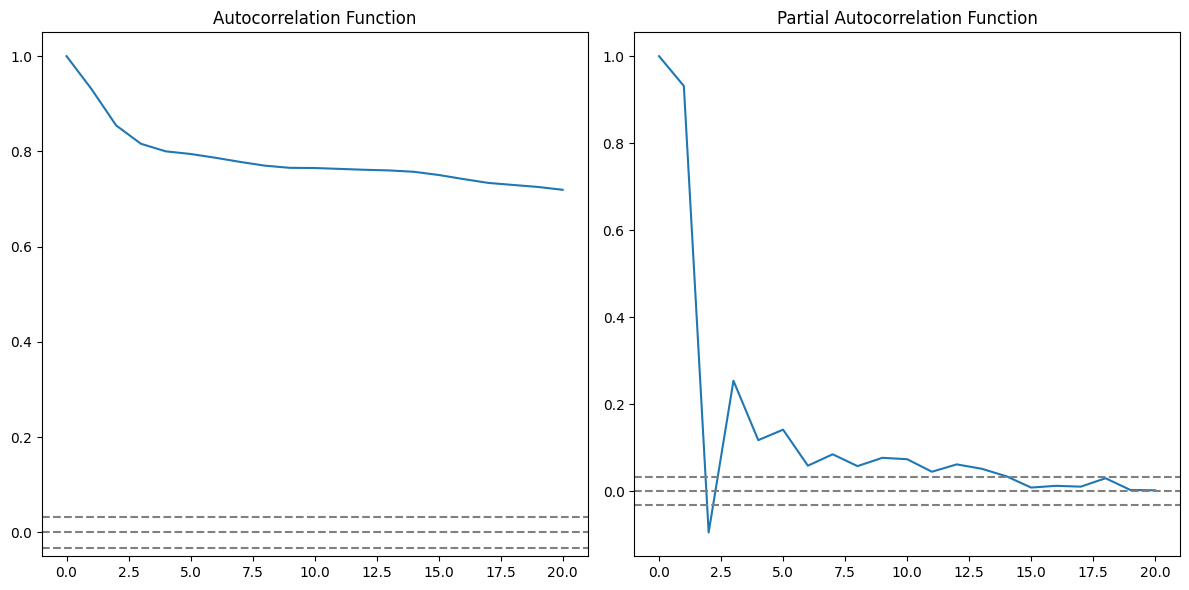

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Dallas   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9843.932
Date:                Thu, 06 Feb 2025   AIC                          19695.864
Time:                        08:31:30   BIC                          19720.839
Sample:                    01-01-2014   HQIC                         19704.740
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8143      0.820     24.168      0.000      18.207      21.421
ar.L1          0.9063      0.009    106.433      0.000       0.890       0.923
ma.L1          0.1864      0.013     13.846      0.0

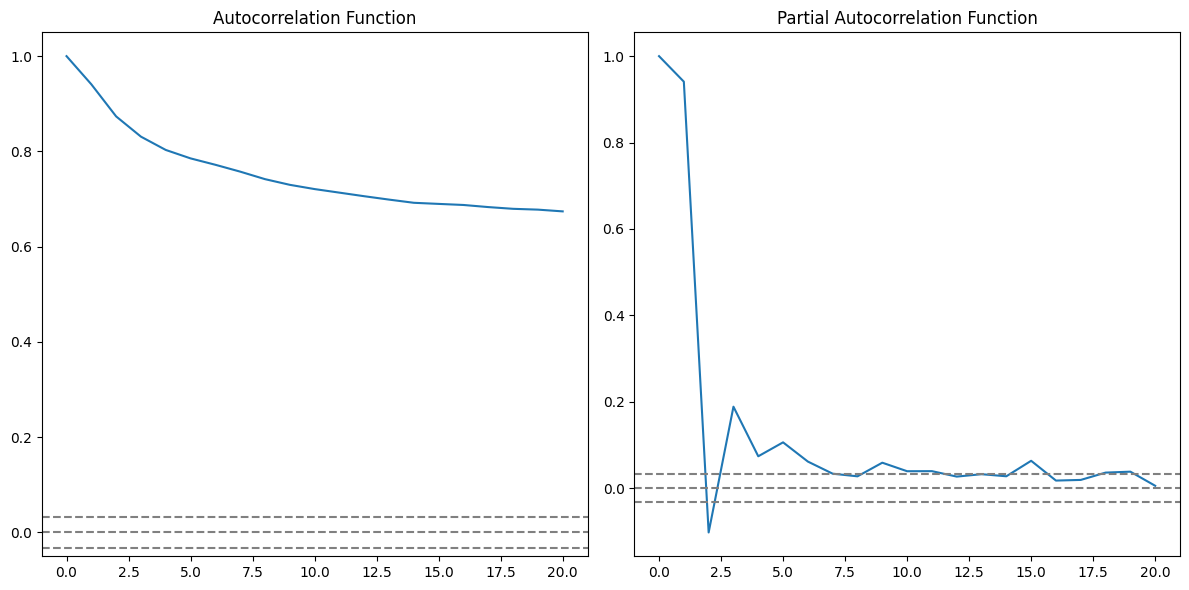

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Essen   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8402.614
Date:                Thu, 06 Feb 2025   AIC                          16813.228
Time:                        08:31:31   BIC                          16838.203
Sample:                    01-01-2014   HQIC                         16822.104
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3449      0.547     20.756      0.000      10.274      12.416
ar.L1          0.9218      0.007    140.342      0.000       0.909       0.935
ma.L1          0.1649      0.016     10.111      0.0

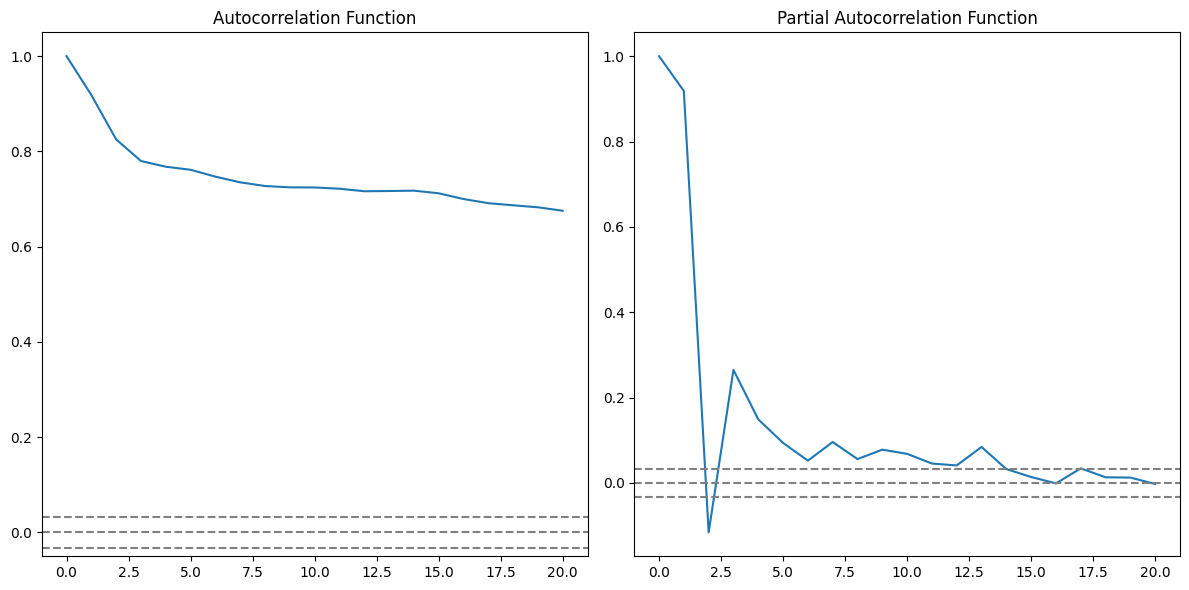

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Houston   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9424.974
Date:                Thu, 06 Feb 2025   AIC                          18857.947
Time:                        08:31:31   BIC                          18882.923
Sample:                    01-01-2014   HQIC                         18866.823
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6351      0.629     34.378      0.000      20.402      22.869
ar.L1          0.8838      0.010     92.016      0.000       0.865       0.903
ma.L1          0.2202      0.014     16.171      0.0

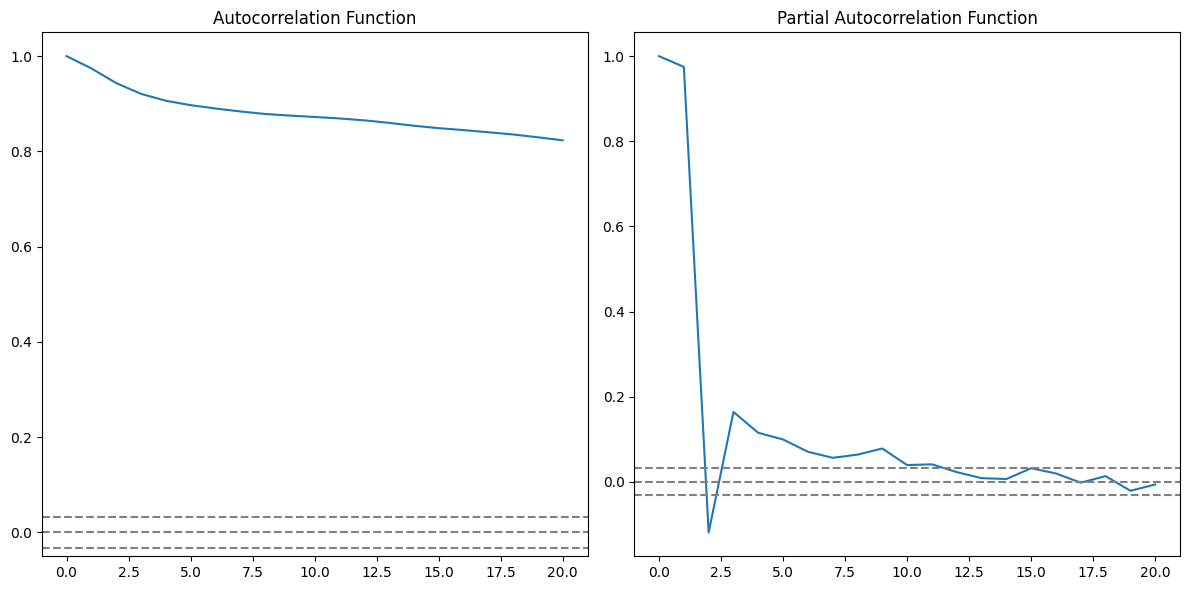

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Las Vegas   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8190.828
Date:                Thu, 06 Feb 2025   AIC                          16389.656
Time:                        08:31:32   BIC                          16414.631
Sample:                    01-01-2014   HQIC                         16398.532
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6051      1.298     16.650      0.000      19.062      24.148
ar.L1          0.9666      0.005    200.059      0.000       0.957       0.976
ma.L1          0.1637      0.014     11.521      0.0

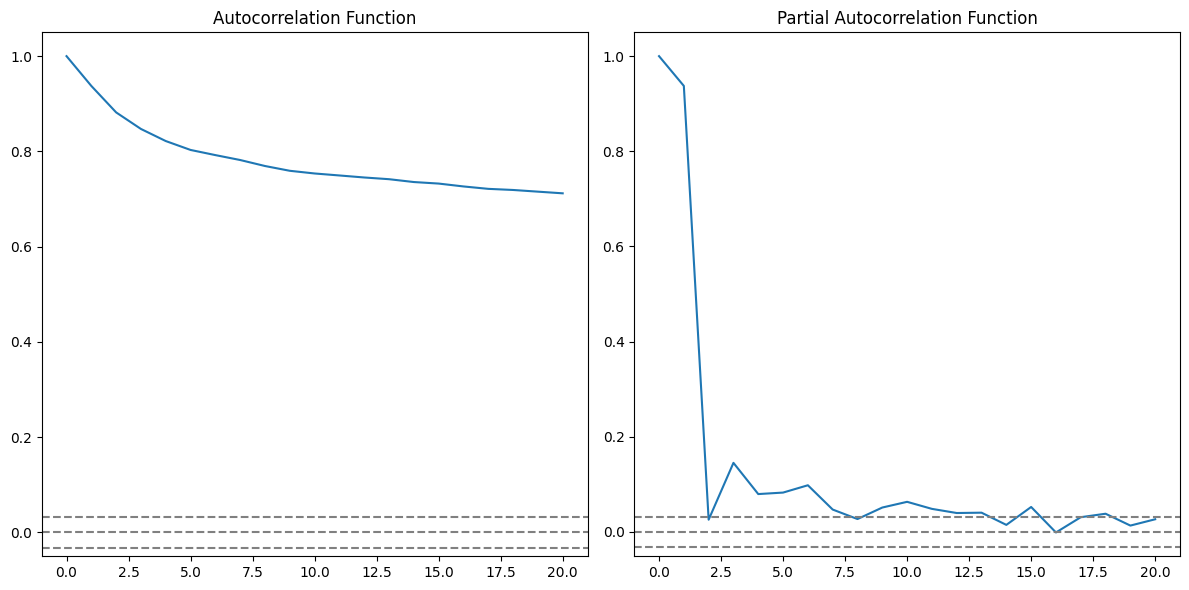

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 London   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7956.944
Date:                Thu, 06 Feb 2025   AIC                          15921.888
Time:                        08:31:33   BIC                          15946.863
Sample:                    01-01-2014   HQIC                         15930.764
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2554      0.542     22.593      0.000      11.192      13.319
ar.L1          0.9422      0.006    166.530      0.000       0.931       0.953
ma.L1         -0.0404      0.017     -2.379      0.0

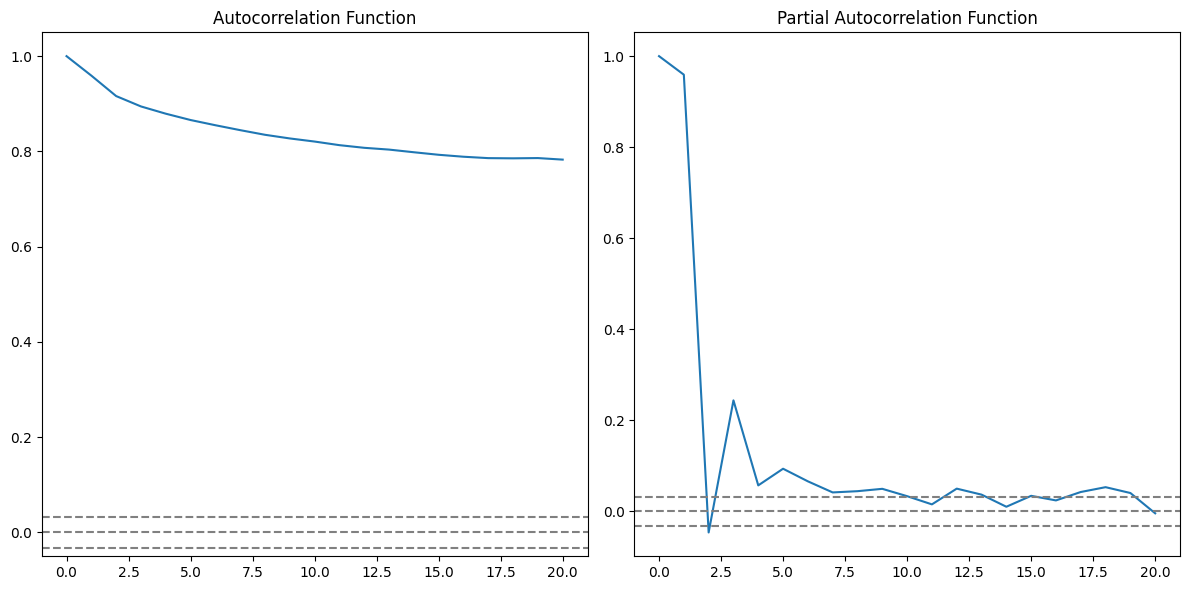

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Minneapolis   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10209.019
Date:                Thu, 06 Feb 2025   AIC                          20426.037
Time:                        08:31:34   BIC                          20451.012
Sample:                    01-01-2014   HQIC                         20434.913
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5067      1.432      5.942      0.000       5.701      11.313
ar.L1          0.9527      0.005    188.417      0.000       0.943       0.963
ma.L1          0.0942      0.014      6.567      0.0

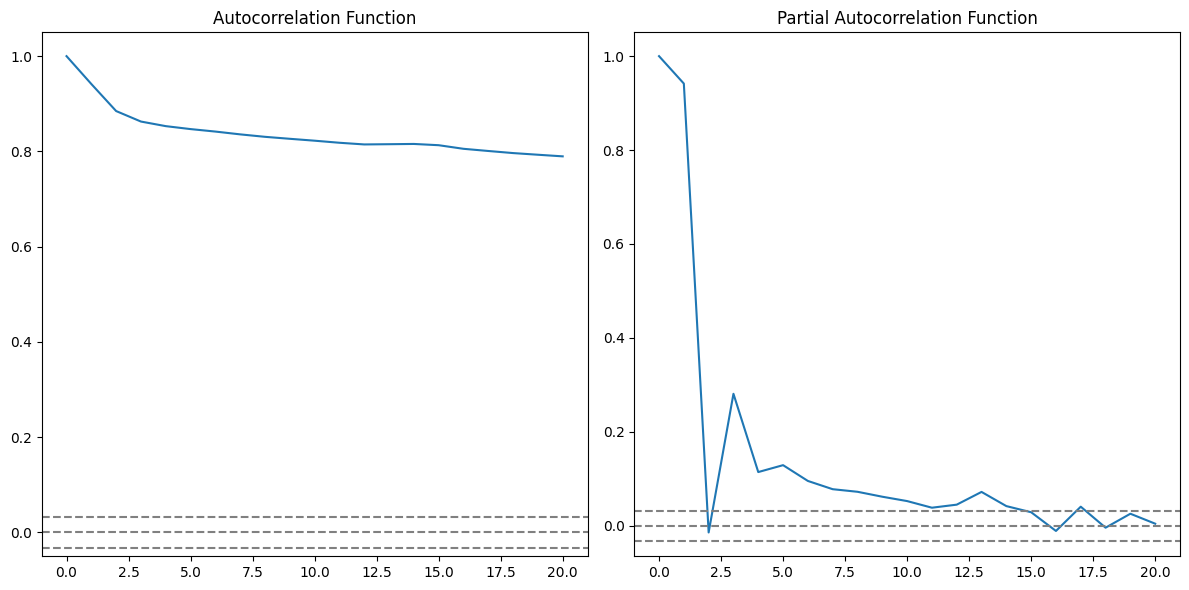

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               New York   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9849.862
Date:                Thu, 06 Feb 2025   AIC                          19707.725
Time:                        08:31:35   BIC                          19732.700
Sample:                    01-01-2014   HQIC                         19716.601
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9095      0.932     14.926      0.000      12.083      15.736
ar.L1          0.9379      0.006    149.769      0.000       0.926       0.950
ma.L1          0.0363      0.015      2.366      0.0

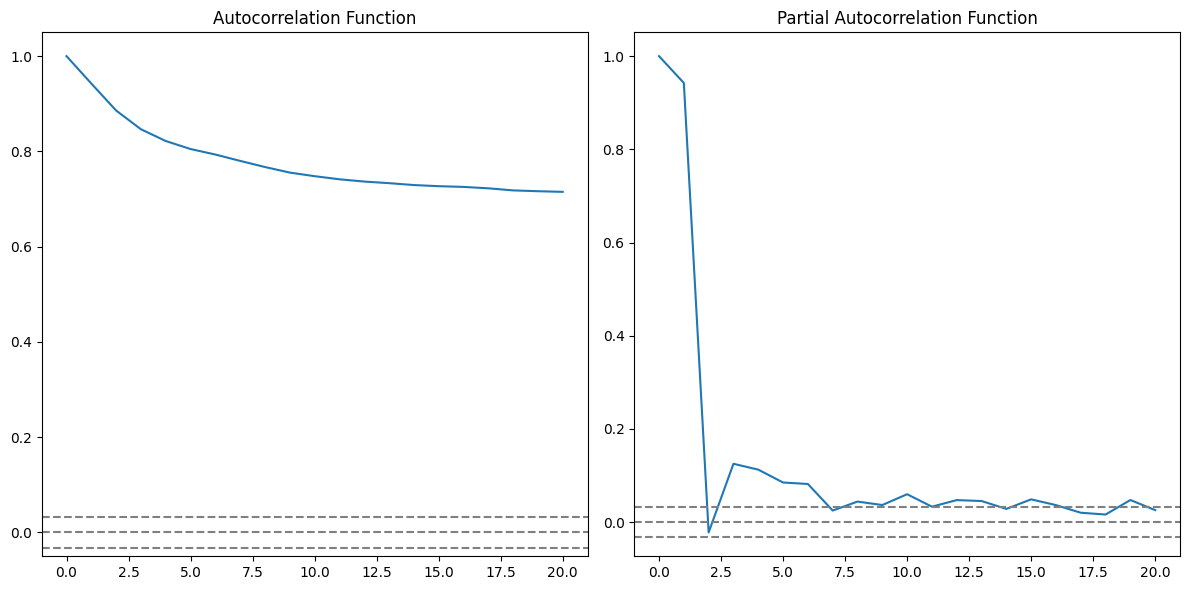

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Paris   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8353.981
Date:                Thu, 06 Feb 2025   AIC                          16715.962
Time:                        08:31:37   BIC                          16740.937
Sample:                    01-01-2014   HQIC                         16724.838
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8469      0.597     21.522      0.000      11.677      14.017
ar.L1          0.9388      0.006    163.847      0.000       0.928       0.950
ma.L1          0.0313      0.016      1.921      0.0

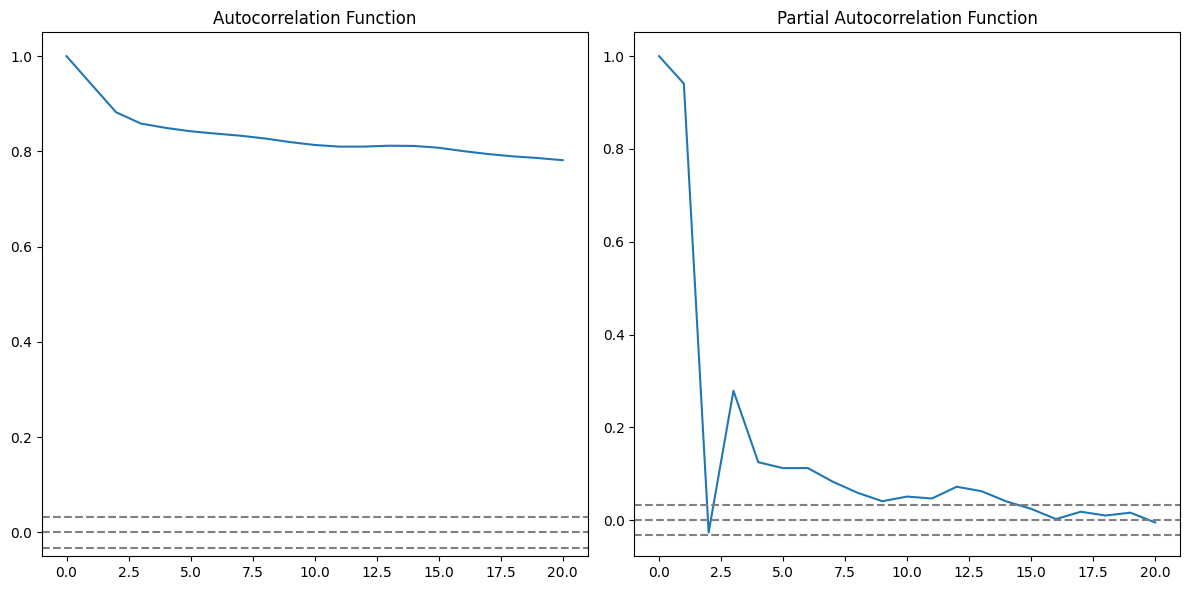

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Philadelphia   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9875.682
Date:                Thu, 06 Feb 2025   AIC                          19759.364
Time:                        08:31:37   BIC                          19784.339
Sample:                    01-01-2014   HQIC                         19768.239
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0861      0.933     15.100      0.000      12.258      15.914
ar.L1          0.9337      0.007    137.879      0.000       0.920       0.947
ma.L1          0.0648      0.015      4.312      0.0

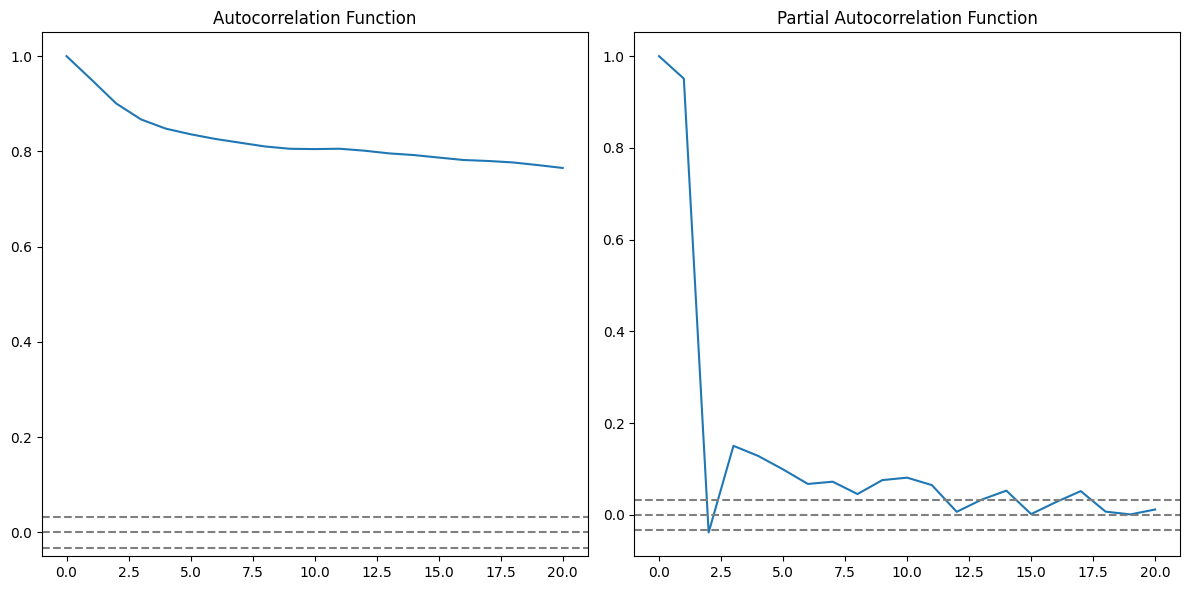

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Portland   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8246.239
Date:                Thu, 06 Feb 2025   AIC                          16500.478
Time:                        08:31:38   BIC                          16525.454
Sample:                    01-01-2014   HQIC                         16509.354
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2369      0.670     19.753      0.000      11.923      14.550
ar.L1          0.9458      0.005    174.846      0.000       0.935       0.956
ma.L1          0.0565      0.016      3.438      0.0

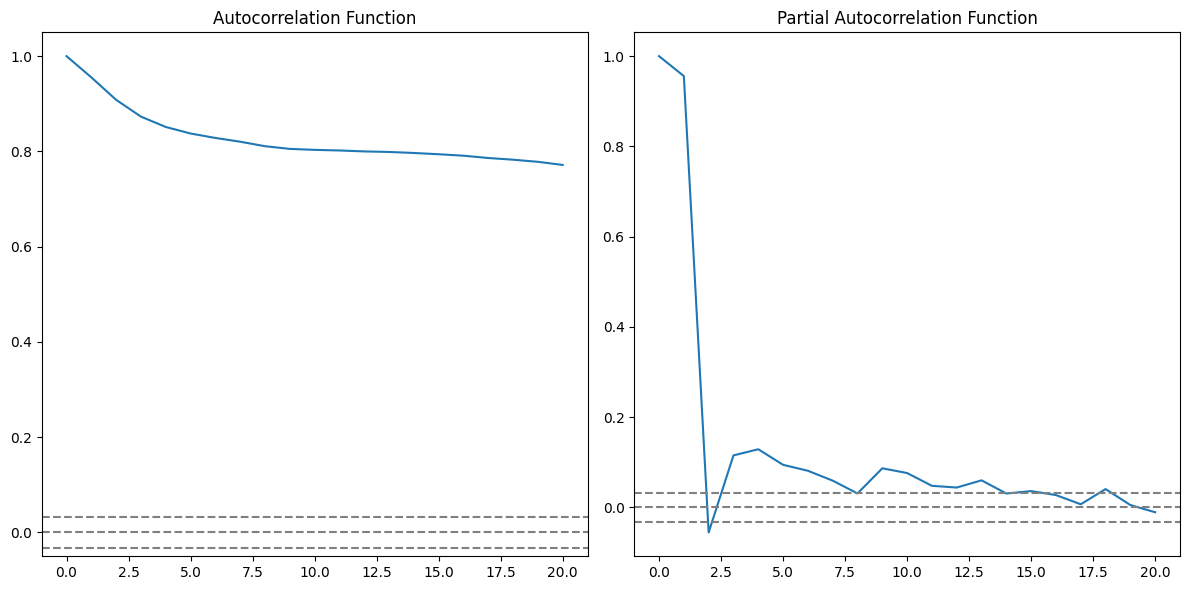

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Sacramento   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7800.776
Date:                Thu, 06 Feb 2025   AIC                          15609.553
Time:                        08:31:39   BIC                          15634.528
Sample:                    01-01-2014   HQIC                         15618.429
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9911      0.656     25.900      0.000      15.705      18.277
ar.L1          0.9497      0.005    186.099      0.000       0.940       0.960
ma.L1          0.0732      0.016      4.450      0.0

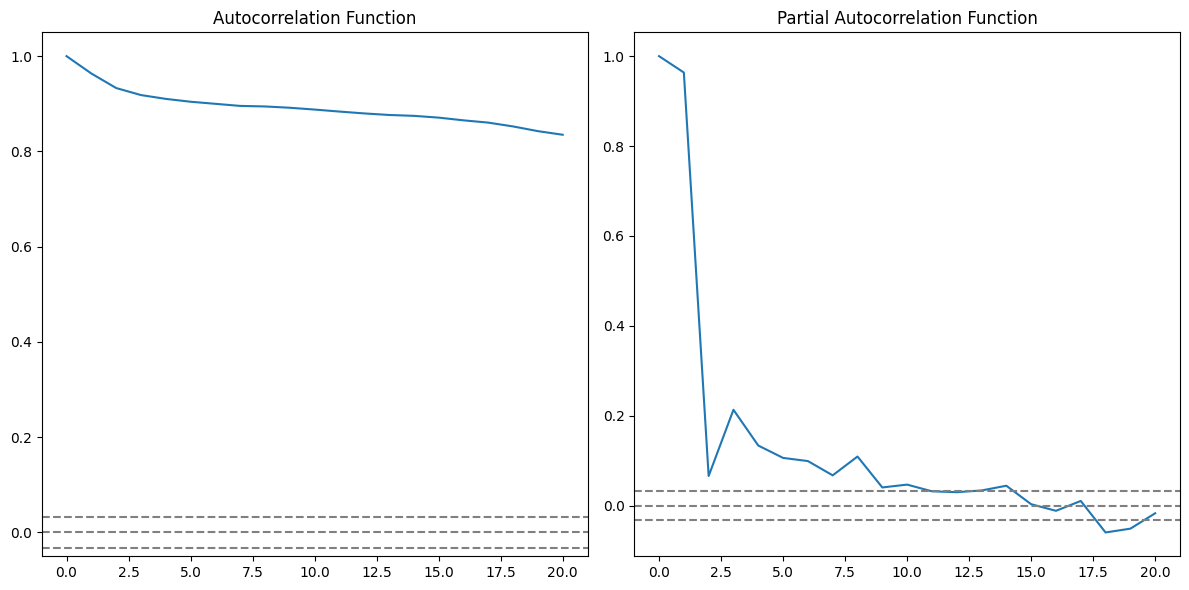

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Tokyo   No. Observations:                 3804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8209.592
Date:                Thu, 06 Feb 2025   AIC                          16427.183
Time:                        08:31:41   BIC                          16452.158
Sample:                    01-01-2014   HQIC                         16436.059
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4408      1.131     14.532      0.000      14.223      18.658
ar.L1          0.9726      0.004    221.523      0.000       0.964       0.981
ma.L1         -0.1318      0.015     -8.849      0.0

In [21]:
for city in t_avg.columns:

    result = adfuller(t_avg[city])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
    d = 0
    while result[1] > 0.05:
        ts = ts.diff().dropna()
        result = adfuller(ts)
        d += 1

    print(f'Order of differencing (d): {d}')
    lag_acf = acf(t_avg[city], nlags=20)
    lag_pacf = pacf(t_avg[city], nlags=20, method='ols')

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(t_avg[city])), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(t_avg[city])), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')

    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(t_avg[city])), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(t_avg[city])), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()

 
    p = 1
    q = 1

    # Fit the ARIMA model
    model = ARIMA(t_avg[city], order=(p, d, q))
    model_fit = model.fit()
    print(model_fit.summary())